## Final Project Submission

* Student name: Leonard Mwangi Gachimu
* Student pace: Part-Time
* Scheduled project review date/time: 24th July 2023
* Instructor name: Asha Ahmed Deen
* Blog post URL: https://github.com/leogachimu/Microsoft-Movie-Business-Analysis/

# Project Title: Movie Studio Business Analysis for Microsoft

## Author: Leonard Gachimu

## SECTION I- BUSINESS UNDERSTANDING
According to __[Wikipedia](https://en.wikipedia.org/wiki/Film_industry)__, the cinema industry in the USA, generally referred to as Hollywood, is the oldest film industry in the world and also the largest film industry in terms of revenue. In 2019, the box office revenue for the USA and Canada was \\$11.4 billion, a little over 27% of the worldwide revenue of \\$42.2 billion.

And despite the common narrative that everyone is streaming videos, the __[New Vision blog](https://www.newvisiontheatres.com/hollywood-film-industry-statistics)__ reports that 14% of American watch movies in cinema halls once a month and 46% of adults have reported watching a movie in a cinema hall at least once in a year.

The US cinema industry is expected to grow at a Compound Annual Growth Rate (CAGR) of [8.3% by the year 2027](https://www.enterpriseappstoday.com/stats/film-industry-statistics.html#). 

All the above are indicators of a profitable and growing industry for Microsoft to venture into.

Here's the deal:

Microsoft is not a company that jumps into what everyone else is doing.

There has to be vision, relevant data, analysis of the data, and data driven strategy.

This is what this report is all about.

I don’t want to overpromise, but I hope you will see good use of data cleaning, munging, visualization, and interpretation to tell a story that can make a real difference to Microsoft’s portfolio. 

### OVERVIEW OF THE  ANALYSIS OF THE MOST POPULAR AND PROFITABLE GENRES

In this section, I will first seek to find out the most popular genres based on the number of movies produced. For this task, I will explore, clean, and analyse the dataset title.basics.csv, which contains data about movie id, the premiere, the primary title, the original title, the runtime minutes of a video, and the genre(s) where a video fits.

The second step will be finding out the most popular genres based on the IMDb Top 250 Movies. From Wikipedia and __[the IMDb website](https://www.imdb.com/chart/top/)__ , we learn that the IMDb list of top 250 movies has significant influence on consumer choice of films. This is a list of the top rated 250 films from around the world based on measures such as the average and total sum of ratings received from registered users. 

To provide a more accurate analysis of genre popularity, I downloaded a dataset of the __[IMDb TOP 250 movies from Kaggle.com](https://www.kaggle.com/datasets/ashishjangra27/imdb-top-250-movies)__. The dataset was last updated on January 5, 2023, so it will provide a more updated perspective of genre popularity compared to the dataset from 2019.

Thirdly, from the analysis of genre popularity based on both the number of movies produced and the IMDb Top 250 movies, I will seek to identify what I call 'content gaps'. This means finding out whether there is a genre that is popular based on the IMDb Top 250 movies dataset but producers are not maximizing the genre, based on the total number of movies produced. Microsoft can rapidly produce good movies in such a genre and they will be assured that the movies will be quickly top-rated.

### PROBLEM STATEMENT
1. Which are the 15 most popular genres based on the total number of movies produced (in title.basics.csv dataset)?
2. Which are the 15 most popular genres based on the IMDb Top 250 Movies list?
3. What are the content gaps in terms of genres that Microsoft can exploit?

### IMPORTING THE RELEVANT LIBRARIES

In [1]:
# Import the libraries relevant to data cleaning and analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline

### UNDERSTANDING THE TITLE.BASICS.CSV
The dataset named title.basic.csv contains details about the titles of 146,144 movies obtained from the IMDb database, their premieres, the runtime, and the genres where each film fits.

In [2]:
# Open as a dataframe the file named title.basics.csv which contains details
# such as movie titles and their genres
movie_basics_df = pd.read_csv("unzippedData/title.basics.csv")

# Print the first 5 rows
movie_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
# Print the last 5 rows
movie_basics_df.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [4]:
# Examine the shape (rows by columns) of the dataframe
movie_basics_df.shape

(146144, 6)

In [5]:
# Examine the schema and data types
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [6]:
# Examine missing values in movie_basics_df
movie_basics_df.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [7]:
# Check for duplicate rows in movie_basic_df
# Use keep='first' clause to avoid counting the first value in a set of repeated rows

movie_basics_df.duplicated(keep='first').sum()

0

### DATA PREPARATION OF TITLE.BASICS.CSV DATASET

Some columns may not have missing values or duplicates, but the nature of values may need further examination.  

In [8]:
# Print 10 rows where the primary title includes the popular title 'Harry'
movie_basics_df.loc[movie_basics_df['primary_title'].str.contains('Harry')].head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
231,tt0756727,Who Is Harry Nilsson (And Why Is Everybody Tal...,Who Is Harry Nilsson (And Why Is Everybody Tal...,2010,116.0,"Biography,Documentary,Music"
376,tt0859612,The Golden Greek: The Harry Agganis Story,The Golden Greek: The Harry Agganis Story,2010,NaN,Documentary
457,tt0926084,Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Deathly Hallows: Part 1,2010,146.0,"Adventure,Fantasy,Mystery"
4121,tt10386182,Harry's Island,Harry's Island,2019,NaN,Comedy
4830,tt10437702,The Dream Revisited/Harry Belafonte,The Dream Revisited/Harry Belafonte,2020,NaN,Documentary
5859,tt1201607,Harry Potter and the Deathly Hallows: Part 2,Harry Potter and the Deathly Hallows: Part 2,2011,130.0,"Adventure,Drama,Fantasy"
8938,tt1535110,When Harry Tries to Marry,When Harry Tries to Marry,2011,93.0,"Comedy,Romance"
11171,tt1621795,Harrys Comeback - Letzter Puff vor Helgoland,Harrys Comeback - Letzter Puff vor Helgoland,2010,75.0,Comedy
13095,tt1677548,Hold at All Costs: The Story of the Battle of ...,Hold at All Costs: The Story of the Battle of ...,2010,85.0,Documentary
17273,tt1781796,"Creating the World of Harry Potter, Part 4: So...","Creating the World of Harry Potter, Part 4: So...",2010,54.0,Documentary


In [9]:
# Print 10 rows where the primary title includes the popular title 'Cold'
movie_basics_df.loc[movie_basics_df['primary_title'].str.contains('Cold')].sort_values(by='primary_title').head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
19889,tt1843834,A Cold Day in Hell,A Cold Day in Hell,2011,95.0,Western
91865,tt5312338,A Cold Day in Hell,A Cold Day in Hell,2015,72.0,Drama
90066,tt5209124,A Cold Night,A Cold Night,2015,87.0,"Drama,Mystery,Romance"
141839,tt9292510,A Stone Cold Christmas,A Stone Cold Christmas,2018,90.0,Romance
141132,tt9187888,American Dope: Cold War Heroin Heat,American Dope: Cold War Heroin Heat,2018,56.0,Documentary
19940,tt1844633,Blood Runs Cold,Blood Runs Cold,2011,80.0,Horror
99759,tt5829032,Camp Cold Brook,Camp Cold Brook,2018,86.0,Horror
87138,tt5060874,Cold,Cold,2018,NaN,Drama
37893,tt2368701,Cold Blood,Cold Blood,2012,83.0,Thriller
140214,tt9082020,Cold Blood,Cold Blood Legacy,2019,91.0,"Action,Thriller"


From the filtered rows, we can see that some movies share the same or similar titles. Examples are "A Cold Day in Hell" and "A Cold Day in Hell", "Harry Potter and the Deathly Hallows: Part 1" and "Harry Potter and the Deathly Hallows: Part 2".<br>

However, for such similar movies, their other attributes such the id, start year, runtime minutes, and genres are different. This shows that they must be sequels of the first movie. Therefore, such rows are not duplicates.  

#### Justification for Dropping the original_title Column
<br>
Sometimes a movie's original title may have a different and unintended meaning abroad, and this is why some movies are given a different title when they're released internationally.
It's thus more appropriate to work with the primary title column, and thus I'm going to drop the original title column.

In [10]:
# Dropping the original_title column
movie_basics_df.drop(labels="original_title", axis=1, inplace=True)

#### How to Handle Missing Values in Genres Column

In [11]:
# Examine the nature of unique values in genres column
movie_basics_df['genres'].value_counts()

Documentary                    32185
Drama                          21486
Comedy                          9177
Horror                          4372
Comedy,Drama                    3519
                               ...  
Action,Musical,Sci-Fi              1
Adventure,Crime,Music              1
Music,Musical,Reality-TV           1
History,Horror,Mystery             1
Adventure,Comedy,Reality-TV        1
Name: genres, Length: 1085, dtype: int64

Since genre is categorical data, replacing the missing value with any other genres may skew the results in favor of the replacing genres. 
I will therefore, replace the missing values with a placeholder category named 'Generic'.

In [12]:
# Find percent of missing values in genres column
missing_genres = (movie_basics_df['genres'].isna().sum())/ (len(movie_basics_df['genres']))
print(f"Percent of missing values in genres column is {missing_genres:.2%}")

Percent of missing values in genres column is 3.70%


In [13]:
# Replace the missing values with a placeholder category named 'Generic'
movie_basics_df['genres'] = movie_basics_df['genres'].fillna('Generic')

**How to Handle Missing Runtime Values**

In [14]:
# Sample the dataframe
sample_genre_list = ['Drama', 'Documentary', 'Comedy']
movie_basics_df.loc[(movie_basics_df["runtime_minutes"].notna()) & 
                (movie_basics_df["genres"].isin(sample_genre_list))
               ].sample(10, random_state=5, replace=True)     

,tconst,primary_title,start_year,runtime_minutes,genres
116253,tt6903858,Echo the Now,2017,65.0,Drama
66122,tt3771626,The Brainwashing of My Dad,2015,90.0,Documentary
72656,tt4146876,The African Guest,2014,89.0,Drama
116661,tt6937028,Bratislava: mesto uprostred prirody,2016,52.0,Documentary
19254,tt1828320,In the Hive,2012,111.0,Drama
111375,tt6508998,Elvis Walks Home,2017,90.0,Drama
109868,tt6447452,Pard 888,2016,94.0,Comedy
56503,tt3302788,Kong's Family,2013,108.0,Comedy
113830,tt6716242,Knight Rising,2017,91.0,Drama
115044,tt6817108,Sinvivir,2017,90.0,Drama


A sample of the dataframe where the genre is 'Drama', 'Documentary', or 'Comedy' reveals that the range of runtime minutes is different for different genres.

Also, some movies are fitting into multiple genres.

Therefore, it would be wrong to replace missing values with a measure of central tendency, such as mean, median, or mode. 

In [15]:
# Find percent of missing values in runtime_minutes column
missing_runtimes = (movie_basics_df['runtime_minutes'].isna().sum())/ (len(movie_basics_df['runtime_minutes']))
print(f"Percent of missing values in genres column is {missing_runtimes:.2%}")

Percent of missing values in genres column is 21.72%


The percent of missing values is 21.72%, which is too high to delete the rows without significant effect on further analysis of the dataset.

I will therefore, replace missing runtime minutes with a placeholder '?'

In [16]:
# Replace the missing runtime values with a placeholder '?'
movie_basics_df['runtime_minutes'] = movie_basics_df['runtime_minutes'].fillna('?')

In [17]:
# Check whether we still have missing values in movie_basics_df
movie_basics_df.isna().sum()

tconst             0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

### ANALYSIS OF GENRE DISTRIBUTION BASED ON THE NUMBER OF MOVIES PRODUCED
Genres are categorical data, but a good number of the movies fit in two or more genres, which have been lumped 
as a single line of text separated by commas.
To analyse the distribution of each genre, I will split the lumped genres and append a dictionary with a count for each genre.

In [18]:
# Create a function to iterate over the a column of strings in a dataframe, 
# splits comma separated strings, and appends an empty dictionary 
# with the count of each string

def split_string(lumped_string_df, column):
    string_frequencies = {}
    for strings in lumped_string_df[column]:
        # Iterate over the list of splitted strings 
        for string in strings.split(','):
     # If the string is not in string_frequencies, add it with a value of 1
            if string not in string_frequencies:
                string_frequencies[string] = 1
     # If genre is in genre_frequencies, increment its value by 1
            else:
                string_frequencies[string] += 1
    return string_frequencies
    
# Define parameter values
lumped_string_df = movie_basics_df
column = 'genres'

# Print the dictionary of string frequencies
print(split_string(lumped_string_df, column))

{'Action': 10335, 'Crime': 6753, 'Drama': 49883, 'Biography': 8722, 'Comedy': 25312, 'Fantasy': 3516, 'Horror': 10805, 'Thriller': 11883, 'Adventure': 6465, 'Animation': 2799, 'Documentary': 51640, 'History': 6225, 'Generic': 5408, 'Mystery': 4659, 'Sci-Fi': 3365, 'Romance': 9372, 'Family': 6227, 'War': 1405, 'Music': 4314, 'Sport': 2234, 'Western': 467, 'Musical': 1430, 'Adult': 25, 'News': 1551, 'Talk-Show': 50, 'Reality-TV': 98, 'Game-Show': 4, 'Short': 11}


In [19]:
# Sort the dictionary by value and output the top 15 genres
top_15_genres = sorted(split_string(movie_basics_df, 'genres').items(), key=lambda x: x[1], reverse=True)[:15]
top_15_genres

[('Documentary', 51640),
 ('Drama', 49883),
 ('Comedy', 25312),
 ('Thriller', 11883),
 ('Horror', 10805),
 ('Action', 10335),
 ('Romance', 9372),
 ('Biography', 8722),
 ('Crime', 6753),
 ('Adventure', 6465),
 ('Family', 6227),
 ('History', 6225),
 ('Generic', 5408),
 ('Mystery', 4659),
 ('Music', 4314)]

### VISUALIZATION OF GENRE DISTRIBUTION BASED ON THE TOTAL NUMBER OF MOVIES PRODUCED

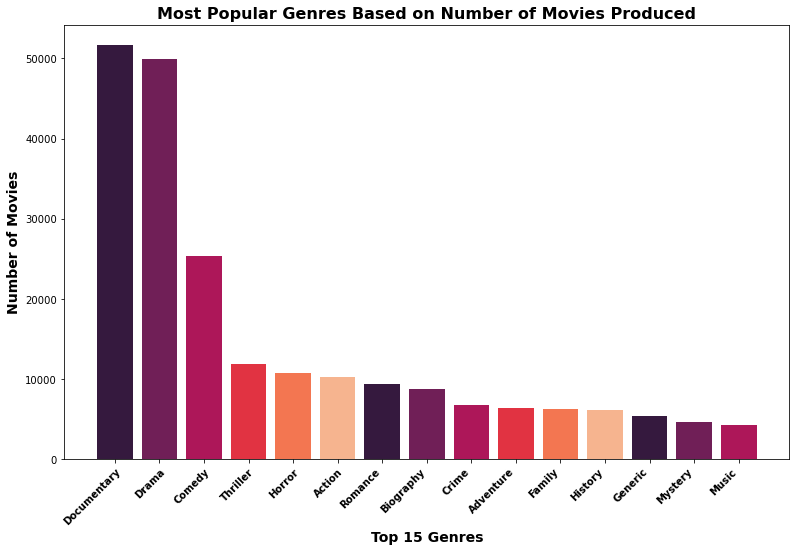

In [20]:
# Plot a bar chart for top 15 genres

# Define the x (labels) and y(values) variables
labels=[x[0] for x in top_15_genres]
values=[x[1] for x in top_15_genres]

# Define the size of the plot
plt.figure(figsize=(13, 8))

# Plot xticks, title, xlabels, and ylabels
plt.xticks(rotation=45, ha='right', va='top', rotation_mode='anchor', fontsize=10, fontweight= 'bold')
plt.title('Most Popular Genres Based on Number of Movies Produced', fontsize=16, fontweight='bold')
plt.xlabel('Top 15 Genres', fontsize=14, fontweight='bold')
plt.ylabel('Number of Movies', fontsize=14, fontweight='bold')

# Create the color palette
palette = sns.color_palette("rocket")

# Plot the bar chart
plt.bar(labels, values, color= palette)

# Remove the default metadata from the plot
plt.show()

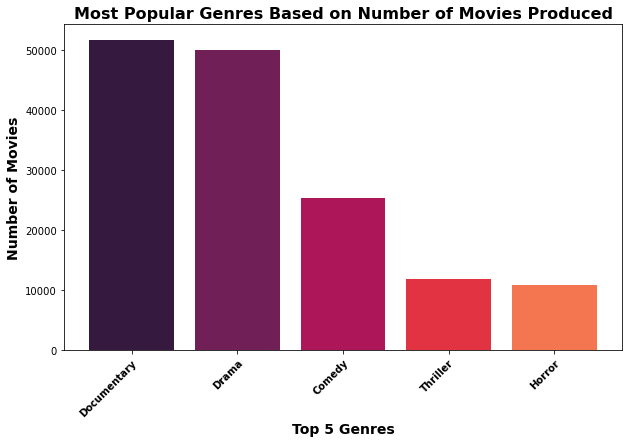

In [23]:
# Plot a bar chart for top 5 genres

# Define the x (labels) and y(values) variables
labels=[x[0] for x in top_15_genres[:5]]
values=[x[1] for x in top_15_genres[:5]]

# Define the size of the plot
plt.figure(figsize=(10, 6))

# Plot xticks, title, xlabels, and ylabels
plt.xticks(rotation=45, ha='right', va='top', rotation_mode='anchor', fontsize=10, fontweight= 'bold')
plt.title('Most Popular Genres Based on Number of Movies Produced', fontsize=16, fontweight='bold')
plt.xlabel('Top 5 Genres', fontsize=14, fontweight='bold')
plt.ylabel('Number of Movies', fontsize=14, fontweight='bold')

# Create the color palette
palette = sns.color_palette("rocket")

# Plot the bar chart
plt.bar(labels, values, color= palette)

# Remove the default metadata from the plot
plt.show()

### Explanation of the Genre Distribution Based on Number of Movies
i.) The bar chart of the genres show that Documentary, Drama, and Comedy are the 3 most popular genres, with the number of movies for each of them exceeding 25,000.

ii.) All the other genres in the top 15 list have around 10,000 movies or less, to their name.

### DATA UNDERSTANDING OF IMDb TOP 250 MOVIES DATASET
From Wikipedia and the IMDb website, we learn that the IMDb list of top 250 movies has significant influence on consumer choice of films.

The IMDB Top 250 is a list of the top rated 250 films from around the world based on measures such as the average and total sum of ratings received from registered users. 

To maintain effectiveness and credibility, IMDb does not disclose the criteria used to select a regular voter and also does not disclose the current formula used to calculate a film’s weighted rating. Nevertheless, here are a few facts:
1.	The minimum number of votes required for a movie to be listed in the Top 250 list is 25,000.
2.	The mean rating for a movie ranges from 1 to 10.
3.	Both the total number of votes and the mean vote contribute to the weighted rating of a movie.<br>

To provide a more accurate analysis of genre popularity, I downloaded a dataset of the __[IMDb TOP 250 movies from Kaggle.com](https://www.kaggle.com/datasets/ashishjangra27/imdb-top-250-movies)__ . The dataset was last updated on January 5, 2023, so it will provide a more current perspective of genre popularity compared to the dataset from 2019.

In [24]:
# Open as a dataframe the file named movies.csv that has details about the 
# IMDb Top 250 movies as at January, 2023
top_250_movies_df = pd.read_csv("IMDb Top 250 Movies/movies.csv", index_col='rank')
top_250_movies_df.head()

,id,name,year,imbd_votes,imdb_rating,certificate,duration,genre,cast_id,cast_name,director_id,director_name,writter_name,writter_id,img_link
rank,,,,,,,,,,,,,,,
1,tt0111161,The Shawshank Redemption,1994,2601152,9.3,A,142,Drama,"nm0000209,nm0000151,nm0348409,nm0006669,nm0000...","Tim Robbins,Morgan Freeman,Bob Gunton,William ...",nm0001104,Frank Darabont,"Stephen King,Frank Darabont","nm0000175,nm0001104",https://m.media-amazon.com/images/M/MV5BMDFkYT...
2,tt0068646,The Godfather,1972,1796656,9.2,A,175,"Crime,Drama","nm0000008,nm0000199,nm0001001,nm0000473,nm0144...","Marlon Brando,Al Pacino,James Caan,Diane Keato...",nm0000338,Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola","nm0701374,nm0000338",https://m.media-amazon.com/images/M/MV5BM2MyNj...
3,tt0468569,The Dark Knight,2008,2572662,9.0,UA,152,"Action,Crime,Drama","nm0000288,nm0005132,nm0001173,nm0000323,nm0350...","Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",nm0634240,Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer","nm0634300,nm0634240,nm0275286",https://m.media-amazon.com/images/M/MV5BMTMxNT...
4,tt0071562,The Godfather Part II,1974,1237934,9.0,A,202,"Crime,Drama","nm0000199,nm0000134,nm0000380,nm0000473,nm0001...","Al Pacino,Robert De Niro,Robert Duvall,Diane K...",nm0000338,Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo","nm0000338,nm0701374",https://m.media-amazon.com/images/M/MV5BMWMwMG...
5,tt0050083,12 Angry Men,1957,768548,9.0,U,96,"Crime,Drama","nm0000020,nm0002011,nm0000842,nm0275835,nm0550...","Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",nm0001486,Sidney Lumet,Reginald Rose,nm0741627,https://m.media-amazon.com/images/M/MV5BMWU4N2...


In [25]:
# Examine the shape (rows by columns) of the dataframe
top_250_movies_df.shape

(250, 15)

In [26]:
# Examine the schema and data types
top_250_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 1 to 250
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             250 non-null    object 
 1   name           250 non-null    object 
 2   year           250 non-null    int64  
 3   imbd_votes     250 non-null    int64  
 4   imdb_rating    250 non-null    float64
 5   certificate    249 non-null    object 
 6   duration       250 non-null    object 
 7   genre          250 non-null    object 
 8   cast_id        250 non-null    object 
 9   cast_name      250 non-null    object 
 10  director_id    250 non-null    object 
 11  director_name  250 non-null    object 
 12  writter_name   250 non-null    object 
 13  writter_id     250 non-null    object 
 14  img_link       250 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 31.2+ KB


In [27]:
# Examine missing values in movie_basics_df
top_250_movies_df.isna().sum()

id               0
name             0
year             0
imbd_votes       0
imdb_rating      0
certificate      1
duration         0
genre            0
cast_id          0
cast_name        0
director_id      0
director_name    0
writter_name     0
writter_id       0
img_link         0
dtype: int64

In [28]:
# Examine the nature of data in certificate column
top_250_movies_df['certificate'].value_counts()

U            79
A            74
UA           47
Passed       13
R             9
Not Rated     8
G             4
7             3
PG            3
18            3
Approved      2
13            1
16            1
15+           1
12+           1
Name: certificate, dtype: int64

In [29]:
# Examine the presence of duplicate rows
# Use keep='first' clause to avoid counting the first value in a set of repeated rows
top_250_movies_df.duplicated(keep='first').sum()

0

### DATA CLEANING OF IMDb TOP 250 MOVIES DATASET
Only the certificate column has a missing entry.<br>

A look at the present certificate values shows that they're categorical. Since the dataset has only 250 top-rated movies, each movie is important to our analysis, and therefore, I will replace the missing certificate value with a placeholder category called 'Generic'.

In [30]:
# Replace missing value in certificate column with a placeholder named 'Generic'
top_250_movies_df['certificate'] = top_250_movies_df['certificate'].fillna('Generic')

In [31]:
# Check whether there any more missing values in certificate column
top_250_movies_df['certificate'].isna().sum()

0

### ANALYSIS OF GENRE DISTRIBUTION BASED ON THE IMDB TOP 250 MOVIES
Genres are categorical data, but a good number of the movies fit in two or more genres, which have been lumped as a single line of text separated by commas. 
To analyse the distribution of each genre, I will split the lumped genres and append a dictionary with a count for each genre.

In [32]:
# Iterate over the genres column, split comma-separated genres, 
# and append an empty dictionary with the count of each genre

# Recall the function split_string(lumped_string_df, column),
# iterates over the a column of strings in a dataframe, 
# splits comma separated strings, and appends an empty dictionary 
# with the count of each string

# Define parameter values
lumped_string_df = top_250_movies_df
column = 'genre'

# Print the dictionary of string counts
print(split_string(lumped_string_df, column))

{'Drama': 177, 'Crime': 51, 'Action': 49, 'Biography': 29, 'History': 10, 'Adventure': 59, 'Western': 6, 'Romance': 23, 'Sci-Fi': 20, 'Fantasy': 16, 'Mystery': 31, 'Family': 13, 'Thriller': 30, 'War': 23, 'Comedy': 47, 'Animation': 23, 'Horror': 6, 'Music': 4, 'Film-Noir': 4, 'Musical': 1, 'Sport': 5}


In [33]:
# Sort the dictionary by value and output the top 15 genres
top_15_genres_in_250 = sorted(split_string(top_250_movies_df, 'genre').items(), key=lambda x: x[1], reverse=True)[:15]
top_15_genres_in_250

[('Drama', 177),
 ('Adventure', 59),
 ('Crime', 51),
 ('Action', 49),
 ('Comedy', 47),
 ('Mystery', 31),
 ('Thriller', 30),
 ('Biography', 29),
 ('Romance', 23),
 ('War', 23),
 ('Animation', 23),
 ('Sci-Fi', 20),
 ('Fantasy', 16),
 ('Family', 13),
 ('History', 10)]

### VISUALIZATION OF GENRE DISTRIBUTION BASED ON THE IMDB TOP 250 MOVIES

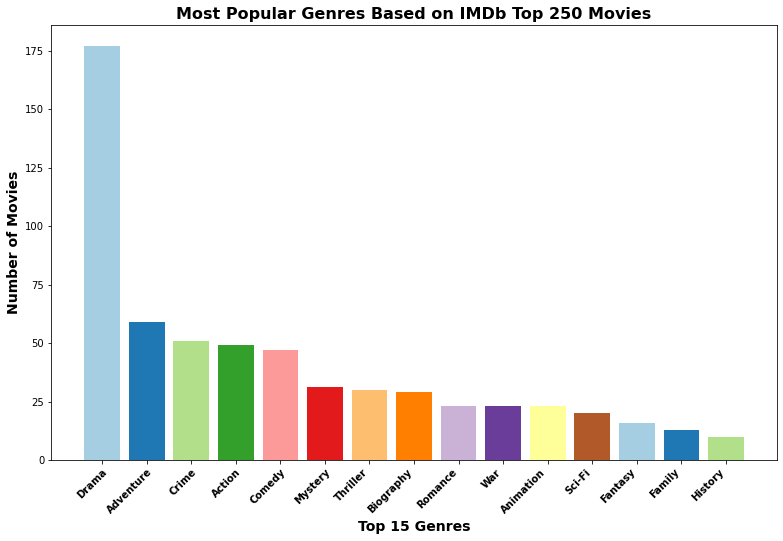

In [34]:
# Plot a bar chart for top 15 genres

# Define the x (labels) and y(values) variables
labels=[x[0] for x in top_15_genres_in_250]
values=[x[1] for x in top_15_genres_in_250]

# Plot xticks, title, xlabels, and ylabels
plt.figure(figsize=(13, 8))

# Plot xticks, title, xlabels, and ylabels
plt.xticks(rotation=45, ha='right', va='top', rotation_mode='anchor', fontsize=10, fontweight= 'bold')
plt.title('Most Popular Genres Based on IMDb Top 250 Movies', fontsize=16, fontweight='bold')
plt.xlabel('Top 15 Genres', fontsize=14, fontweight='bold')
plt.ylabel('Number of Movies', fontsize=14, fontweight='bold')

# Create the color palette
palette = sns.color_palette("Paired")

# Create the bar plot
plt.bar(labels, values, color= palette)

# Removing the default metadata for the plot
plt.show()

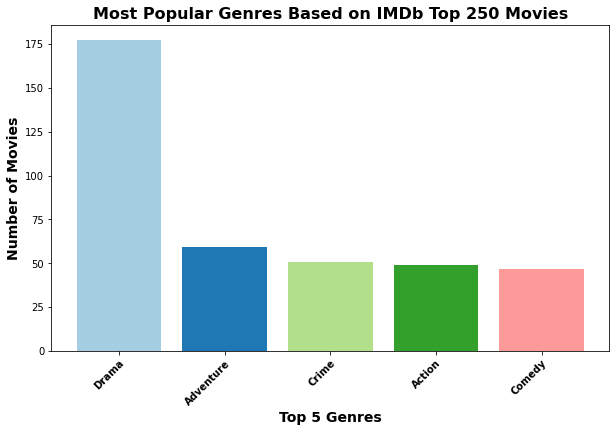

In [37]:
# Plot a bar chart for top 5 genres

# Define the x (labels) and y(values) variables
labels=[x[0] for x in top_15_genres_in_250[:5]]
values=[x[1] for x in top_15_genres_in_250[:5]]

# Plot xticks, title, xlabels, and ylabels
plt.figure(figsize=(10, 6))

# Plot xticks, title, xlabels, and ylabels
plt.xticks(rotation=45, ha='right', va='top', rotation_mode='anchor', fontsize=10, fontweight= 'bold')
plt.title('Most Popular Genres Based on IMDb Top 250 Movies', fontsize=16, fontweight='bold')
plt.xlabel('Top 5 Genres', fontsize=14, fontweight='bold')
plt.ylabel('Number of Movies', fontsize=14, fontweight='bold')

# Create the color palette
palette = sns.color_palette("Paired")

# Create the bar plot
plt.bar(labels, values, color= palette)

# Removing the default metadata for the plot
plt.show()

### Explanation of the Genre Distribution Based on IMDb Top 250 Movies
i.) The bar chart of the genres show that Drama takes the lion's share, with 177 out of the 250 movies fitting in the Drama category.<br>
ii.) Adventure and Crime are the second and third most popular genres with 59 and 51 movies to their name, respectively.<br>
iii.) Action and Comedy are the fourth and fifth most popular genres with 49 and 47 movies to their name, respectively.<br>
iv.) All other genres in the top 15 list have around 30 or fewer movies to their name.

### Identifying Content Gaps
From the analysis and visualization of genre distribution based on both the IMDb Top 250 movies and the total number of movies produced (from the dataset named title.basics.csv), I would like to identify whether there are some popular genres which are not yet crowded. <br>

This means that the genre is popular based on the IMDb Top 250 movies dataset but producers are not maximizing the genre, based on the analysis of genre distribution in the dataset title.basics.csv. Microsoft can rapidly produce good movies in such a genre and they will be assured that the movies will be top-rated.<br>

To identify the content gap, I will create two bar charts of genre distribution (based IMDb Top 250 movies and the number of movies produced) on the same axis.

In [95]:
# Create a dataframe for top_15_genres_in_250 
top_15_genres_in_250_df = pd.DataFrame(top_15_genres_in_250)
top_15_genres_in_250_df.columns= ['genre', 'top_rated_movies']

# Create a dataframe top_15_genres
top_15_genres_df = pd.DataFrame(top_15_genres)
top_15_genres_df.columns= ['genre', 'num_of_all_movies']

# Merge the dataframes
merged_top_15_genres_df = top_15_genres_in_250_df.merge(top_15_genres_df, on='genre', 
                                                       how='outer')
# Replace null values with zero
merged_top_15_genres_df = merged_top_15_genres_df.fillna(0)

<ipython-input-94-7001d528e73c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels = merged_top_15_genres_df['genre'], rotation=45, ha='right',


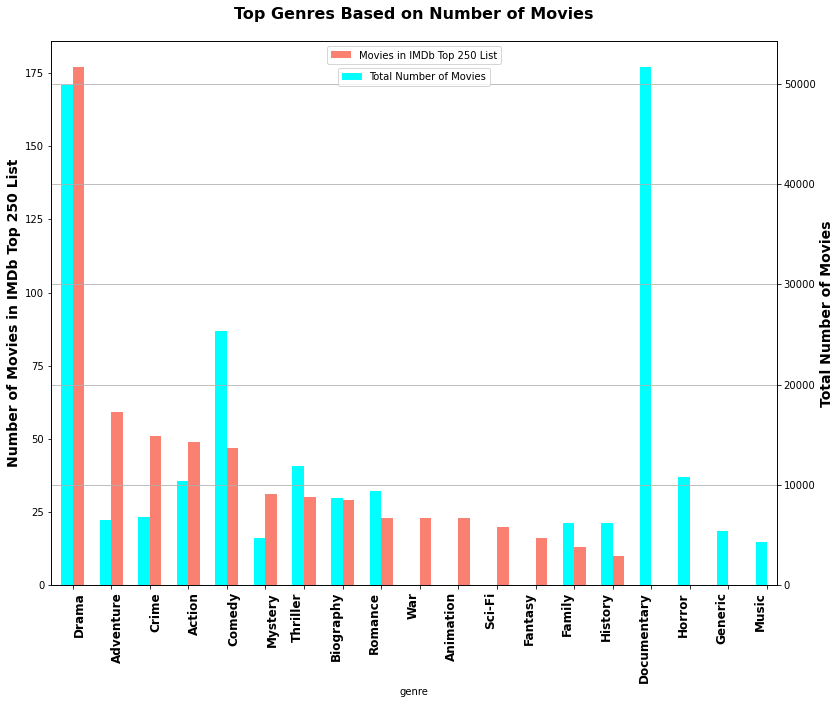

In [94]:
# Create a figure with two y-axes
fig = plt.figure(figsize=(13,10))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
width = .3

# Setting the 'genre' as the common x axis
gr= merged_top_15_genres_df.set_index('genre')

# Plotting the xticks, title, and the axis labels.
ax1.set_xticklabels(labels = merged_top_15_genres_df['genre'], rotation=45, ha='right', 
                    va='top', rotation_mode='anchor', fontsize=12, fontweight= 'bold')

plt.title('Top Genres Based on Number of Movies', fontsize=16, fontweight='bold', y=1.03)
ax1.set_ylabel('Number of Movies in IMDb Top 250 List', fontsize=14, fontweight='bold')
ax2.set_ylabel('Total Number of Movies', fontsize=14, fontweight='bold')
 
# Define the labels
label1 = 'Movies in IMDb Top 250 List'
label2 = 'Total Number of Movies'

# Plot the bar chart for the number of movies in IMDb Top 250 movies
gr['top_rated_movies'].plot(kind='bar',color='salmon', ax=ax1, 
                            width=width, position=0, label=label1)
ax1.legend(loc='upper center')

# Plot the bar chart for the total number of movies per genre
gr['num_of_all_movies'].plot(kind='bar',color='aqua', ax=ax2, 
                             width=width, position=1, label=label2)
ax2.legend(bbox_to_anchor=(0.5, 0.96), loc='upper center')

plt.grid()
plt.show()

### Explanation of the Content Gap Based on the Two Plots of Genre Distribution
From the plot of genre distribution based on IMDb top 250 movies, we can see that Drama, Adventure, Crime, Action, and Comedy are the top 5 most popular genres.<br>

However, the second plot of genre distribution based on total number of movies produced show that the top 5 genres are Documentary, Drama, Comedy, Thriller, and Horror. 

Since the IMDb top 250 movies list is the most reliable guide for consumer trends, we can conclude that Adventure, Crime, and Action are popular but are not crowded in terms of content. Therefore, I will advise Microsoft to focus more of their movie production on the Drama genre because it is by far the most popular genre, but also to give special focus to Adventure, Crime, and Action because they are also popular and may not be as competitive as the Drama and Comedy genres.

A limitation of the study is the fact that the data for IMDb top 250 movies is updated to January 2023, while the data for total number of movies produced per genre dates back to around July 2019. So we don't have knowledge of the current trends in terms of number of movies produced per genre.

## SECTION III - COMPETITOR ANALYSIS

### OVERVIEW OF THE ANALYSIS OF THE MOST PROFITABLE STUDIOS AND GENRES
In this section, I will seek to find out the most profitable studios and genres.
To achieve this end, I will use these two datasets:
1. bom.movie_gros.csv that contains details about a movie's title, the studio associated with it, the domestic gross revenue, the foreign gross revenue, and the year it premiered.
2. tn.movie_budgets.csv that contains details about a movie's id, the release date, the movie's name, the production budget, the domestic gross revenue, and the worldwide gross revenue.

After exploring, and cleaning the datasets, I will merge them so as to link studios with production budget and worldwide gross revenue. This will enable me to compute the profit per studio.
I will also merge the above merged dataframe with the movie_basics_df dataframe (created from title.basic.csv dataset), so as to link genres with profits. This analysis will help us to find out the most profitable genres.

### PROBLEM STATEMENT
I will seek to answer these questions:
1. Which are the top 10 most profitable movie studios?
2. Which are the top 15 most profitable genres? What amount of profit did each genre make?
3. How does the top 15 most profitable genre list compare with the top 15 most popular genre list?

### DATA UNDERSTANDING FOR BOM.MOVIE_GROSS.CSV
The dataset bom.movie_gross.csv contains data obtained from Box Office Mojo, an American website that tracks box-office revenue in a systematic, algorithmic way. The dataset details the title of about 3,300 movies, their studio that exhibited the movie, the domestic gross revenue made from the movie, the foreign gross revenue, and year when a movie premiered.

In [96]:
# Open as a dataframe the file named bom.movie_gross that has details such
# a movie's domestic gross income and foreign gross income
movie_gross_df = pd.read_csv('unzippedData/bom.movie_gross.csv')

# Print the first 5 rows
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [97]:
# Examine the last 5 rows
movie_gross_df.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [98]:
# Examine the shape (rows by columns) of the dataframe
movie_gross_df.shape

(3387, 5)

In [99]:
# Examine the schema and data types
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [100]:
# Examine the missing values
movie_gross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [101]:
# Check whether there are duplicated rows
movie_gross_df.duplicated().sum()

0

In [102]:
# Examine the nature of the column values
movie_gross_df.value_counts().sum()

2007

### DATA UNDERSTANDING FOR TN.MOVIE_BUDGETS.CSV

In [103]:
# Open as a dataframe the file named bom.movie_gross that has details such
# a movie's domestic gross income and foreign gross income
# The column id doesn't represent an index, so we won't assign it the index column
movie_budgets_df = pd.read_csv('unzippedData/tn.movie_budgets.csv')

# Print the first 5 rows
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,7-Jun-19,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,1-May-15,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [104]:
# Examine the last 5 rows
movie_budgets_df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,31-Dec-18,Red 11,"$7,000",$0,$0
5778,79,2-Apr-99,Following,"$6,000","$48,482","$240,495"
5779,80,13-Jul-05,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,29-Sep-15,A Plague So Pleasant,"$1,400",$0,$0
5781,82,5-Aug-05,My Date With Drew,"$1,100","$181,041","$181,041"


In [105]:
# Examine the shape (rows by columns) of the dataframe
movie_budgets_df.shape

(5782, 6)

In [106]:
# Examine the schema and data types
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [107]:
# Convert release_date from string data type to datetype
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'])
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 271.2+ KB


In [108]:
# Examine missing values in movie_basics_df
movie_budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [109]:
# Check whether there are duplicated rows
movie_budgets_df.duplicated().sum()

0

### DATA CLEANING OF MOVIE_GROSS_DF
Cleaning this data set will first involve examining the kind of values in the studio column, as well as the percent of missing values, which will help in deciding how to handle the missing values.

For the missing values in the domestic_gross and foreign_gross columns, an observation of the two datasets movie_gross_df and movie_budget_df shows that I will need to join the two tables at the rows where the names of movies match. This will enable me to analyse the budget, domestic revenue, worldwide revenue, and gross profitability of each movie. 

I will therefore, compare and decide whether to replace the missing values or whole columns of domestic_gross and foreign_gross in movie_gross_df with the matching values from the dataframe movie_budgets_df, after joining the two dataframes.

In [110]:
# Examine the nature of values in studio column
movie_gross_df['studio'].value_counts()

IFC             166
Uni.            147
WB              140
Fox             136
Magn.           136
               ... 
Darin Southa      1
Mon               1
B360              1
ELS               1
Cleopatra         1
Name: studio, Length: 257, dtype: int64

In [111]:
# Find percent of missing values in genres column
missing_studios = (movie_gross_df['studio'].isna().sum())/ (len(movie_gross_df['studio']))
print(f"Percent of missing values in studios column is {missing_studios:.2%}")

Percent of missing values in studios column is 0.15%


The values in studio column are categorical and since only 5 (0.15%) are missing, I will replace the missing values with a generic category as a placeholder. 

In [112]:
movie_gross_df['studio'] = movie_gross_df['studio'].fillna('Generic')

In [113]:
# Confirm that there are no missing values in studio column
movie_gross_df['studio'].isna().sum()

0

### DATA CLEANING OF MOVIE_BUDGETS_DF
Cleaning this dataset will involve stripping the values in production_budget, domestic_gross, and worldwide_gross columns of the dollar ($) sign and converting them to the integer datatype.

In [114]:
# Use .replace() method to remove all occurences of , and $ signs
# Convert the values to numeric (integer) type
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].str.replace(',', '').str.replace('$', '').apply(pd.to_numeric)
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].str.replace(',', '').str.replace('$', '').apply(pd.to_numeric)
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].str.replace(',', '').str.replace('$', '').apply(pd.to_numeric)

In [115]:
# Confirm the data types of movie_budgets_df have changed
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


### DATA ANALYSIS OF MOVIE_GROSS_DF AND MOVIE_BUDGETS_DF

Since we need to combine the dateframes at the rows where movie names are common, we will use inner merge instead of inner join.

In [116]:
# Inner merge of movie_gross_df and movie_budgets_df
merged_gross_and_budgets_df = movie_gross_df.merge(movie_budgets_df, left_on='title', 
                                                   right_on='movie', how='inner')
# Print the first 10 rows
merged_gross_and_budgets_df.head(10)

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,2010-06-18,Toy Story 3,200000000,415004880,1068879522
1,Inception,WB,292600000.0,535700000,2010,38,2010-07-16,Inception,160000000,292576195,835524642
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,2010-05-21,Shrek Forever After,165000000,238736787,756244673
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,2010-06-30,The Twilight Saga: Eclipse,68000000,300531751,706102828
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,2010-05-07,Iron Man 2,170000000,312433331,621156389
5,Tangled,BV,200800000.0,391000000,2010,15,2010-11-24,Tangled,260000000,200821936,586477240
6,Despicable Me,Uni.,251500000.0,291600000,2010,50,2010-07-09,Despicable Me,69000000,251513985,543464573
7,How to Train Your Dragon,P/DW,217600000.0,277300000,2010,30,2010-03-26,How to Train Your Dragon,165000000,217581232,494870992
8,The Chronicles of Narnia: The Voyage of the Da...,Fox,104400000.0,311300000,2010,48,2010-12-10,The Chronicles of Narnia: The Voyage of the Da...,155000000,104386950,418186950
9,The Karate Kid,Sony,176600000.0,182500000,2010,77,2010-06-11,The Karate Kid,40000000,176591618,351774938


In [117]:
# Drop the id and movie columns
merged_gross_and_budgets_df.drop(labels=['id', 'movie'], axis=1, inplace=True)

In [118]:
# Check for missing values in 'domestic_gross_y' and 'worldwide_gross' columns
merged_gross_and_budgets_df[['domestic_gross_y', 'worldwide_gross']].isna().sum()

domestic_gross_y    0
worldwide_gross     0
dtype: int64

In [119]:
merged_gross_and_budgets_df.shape

(1247, 9)

We will now sample the dataset to compare the different gross revenue columns.

In [120]:
# Create a new dataframe without the missing values in 'domestic_gross_x' 
# and 'foreign_gross' columns
sampling_df = merged_gross_and_budgets_df.dropna(subset=['domestic_gross_x', 'foreign_gross'], axis=0).copy()

# Create a new column for sum of 'domestic_gross_x' and 'foreign_gross'
sampling_df['total_gross_x'] = (sampling_df['domestic_gross_x'].apply(pd.to_numeric) + 
                               sampling_df['foreign_gross'].str.replace(',', '').apply(pd.to_numeric))

# Perform random sampling of rows to compare domestic, foreign, and gross revenues
sampling_df = sampling_df[sampling_df["foreign_gross"].notna()].sample(5, random_state=2)
sampling_df

,title,studio,domestic_gross_x,foreign_gross,year,release_date,production_budget,domestic_gross_y,worldwide_gross,total_gross_x
91,For Colored Girls,LGF,37700000.0,17300,2010,2010-11-05,21000000,37729698,38017873,37717300.0
832,The Longest Ride,Fox,37400000.0,25500000,2015,2015-04-10,34000000,37446117,63802928,62900000.0
616,Before Midnight,SPC,8100000.0,3100000,2013,2013-05-24,3000000,8110621,23251930,11200000.0
405,The Campaign,WB,86900000.0,18000000,2012,2012-08-10,95000000,86907746,104907746,104900000.0
621,Metallica Through the Never,PH,3400000.0,4600000,2013,2013-09-27,18000000,3419967,9082906,8000000.0


Samples of the sampling_df show that most values of the worldwide_gross column are closely comparable with the corresponding total_gross_x values found by adding domestic_gross_x and foreign_gross. We will therefore drop the domestic_gross_x and foreign_gross columns in the merged dataframe.

In [121]:
# Drop the domestic_gross_x and foreign_gross columns in the merged datafram
merged_gross_and_budgets_df.drop(labels=['domestic_gross_x', 'foreign_gross'], axis=1, inplace=True)

Next, since we want to analyse profit distribution by studio, we will first find the profits by subtracting production budget from the world_wide gross in the marged dataframe.

In [122]:
# Create a profits column
merged_gross_and_budgets_df['profits'] = (merged_gross_and_budgets_df['worldwide_gross'] - 
                                          merged_gross_and_budgets_df['production_budget'])

# Print the first 5 rows
merged_gross_and_budgets_df.head()

,title,studio,year,release_date,production_budget,domestic_gross_y,worldwide_gross,profits
0,Toy Story 3,BV,2010,2010-06-18,200000000,415004880,1068879522,868879522
1,Inception,WB,2010,2010-07-16,160000000,292576195,835524642,675524642
2,Shrek Forever After,P/DW,2010,2010-05-21,165000000,238736787,756244673,591244673
3,The Twilight Saga: Eclipse,Sum.,2010,2010-06-30,68000000,300531751,706102828,638102828
4,Iron Man 2,Par.,2010,2010-05-07,170000000,312433331,621156389,451156389


In [123]:
# Examine the schema and data types
merged_gross_and_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1247 non-null   object        
 1   studio             1247 non-null   object        
 2   year               1247 non-null   int64         
 3   release_date       1247 non-null   datetime64[ns]
 4   production_budget  1247 non-null   int64         
 5   domestic_gross_y   1247 non-null   int64         
 6   worldwide_gross    1247 non-null   int64         
 7   profits            1247 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 87.7+ KB


Since different studios appear in multiple rows, we will group the dataframe by studio and sort it by profit in the descending order.

In [124]:
# Group by studio and sort by profit in descending order
grouped_df = merged_gross_and_budgets_df.groupby('studio').sum([['production_budget'], ['profits']])
grouped_and_sorted_df = grouped_df.sort_values(by='profits', ascending=False)

# Reset the index inplace
grouped_and_sorted_df.reset_index(inplace=True)

# Print the dataframe
grouped_and_sorted_df

,studio,year,production_budget,domestic_gross_y,worldwide_gross,profits
0,BV,145001,9450800000,12926142171,33286017937,23835217937
1,Uni.,235628,6597700000,10706840840,27329288200,20731588200
2,Fox,221510,7755500000,9410233951,26795813328,19040313328
3,WB,205399,8197700000,9130527872,22193811969,13996111969
4,Sony,149004,5050500000,7059959451,17601810459,12551310459
...,...,...,...,...,...,...
95,MNE,10062,96000000,9993818,62520185,-33479815
96,VE,6050,44357373,4777340,7937699,-36419674
97,Anch.,18095,88250000,19222418,32415497,-55834503
98,Free,6034,102500000,316571,25791984,-76708016


### DATA VISUALIZATION OF PROFIT DISTRIBUTION  FOR DIFFERENT MOVIE STUDIOS

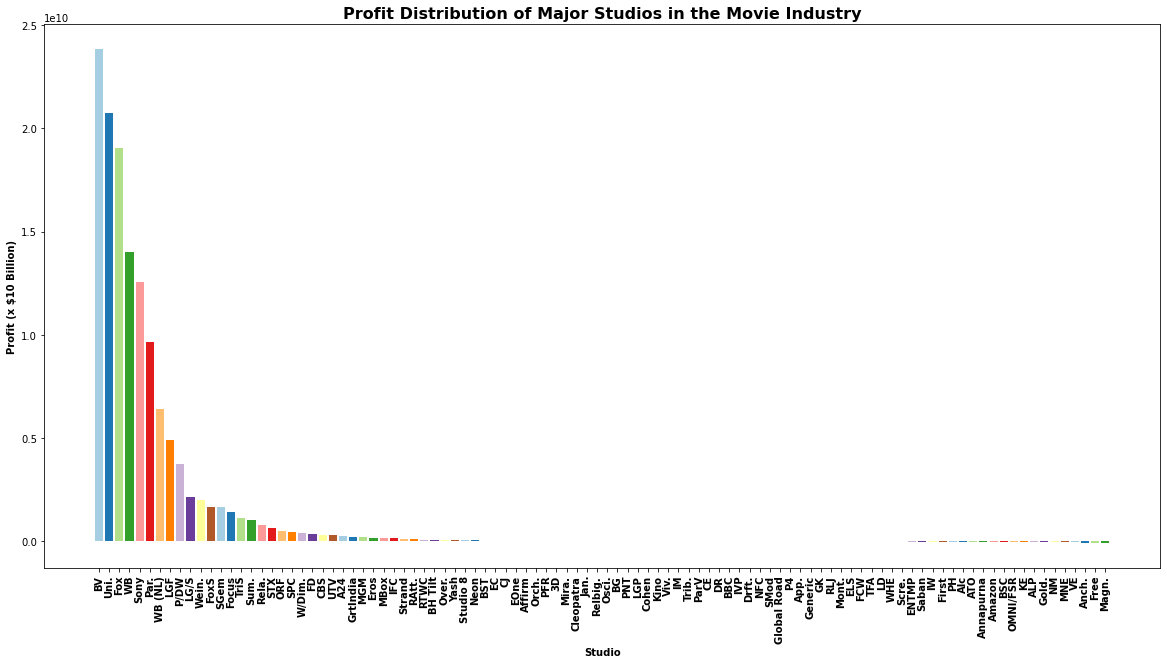

In [125]:
# Plot a bar chart of gross profit per studio

# Define the labels and values
labels= grouped_and_sorted_df['studio']
values= grouped_and_sorted_df['profits']

# Define the plot size
plt.figure(figsize=(20, 10))

# Define the xticks, title, xlabels, and ylabels
plt.xticks(rotation=90, fontsize=10, fontweight= 'bold')
plt.title('Profit Distribution of Major Studios in the Movie Industry', fontsize=16, fontweight='bold')
plt.xlabel('Studio', fontsize=10, fontweight='bold')
plt.ylabel('Profit (x $10 Billion)', fontsize=10, fontweight='bold')

# Create the color palette
palette = sns.color_palette("Paired")

# Plot the bar chart
plt.bar(labels, values, color= palette, label='Studio')

# Remove default metadata
plt.show()

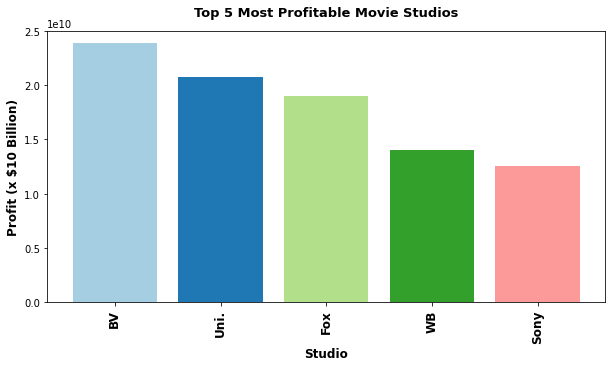

In [132]:
# Plot a bar chart of top 5 most profitable studios

# Define the labels and values
labels= grouped_and_sorted_df['studio'][:5]
values= grouped_and_sorted_df['profits'][:5]

# Define the plot size
plt.figure(figsize=(10, 5))

# Define the xticks, title, xlabels, and ylabels
plt.xticks(rotation=90, fontsize=12, fontweight= 'bold')
plt.title('Top 5 Most Profitable Movie Studios', fontsize=13, fontweight='bold', y=1.03)
plt.xlabel('Studio', fontsize=12, fontweight='bold')
plt.ylabel('Profit (x $10 Billion)', fontsize=12, fontweight='bold')

# Create the color palette
palette = sns.color_palette("Paired")

# Plot the bar chart
plt.bar(labels, values, color= palette, label='Studio')

# Remove default metadata
plt.show()

### Explanation of Profit Distribution of Major Studios
From the bar chart of profit per studio, we can observe that:<br>

i.) BV (Buena Vista Studios), Uni. (Universal Studios), and Fox Studios are the 3 most profitable studios, each raking in about 20 billion dollars in profits. <br>

ii.) The other studios in the top 10 ranked in descending order are WB (Warners Bros), Sony, Paramount Pictures, Warners Bros (NL), LGF Studios, P/DW (DreamWorks Pictures), and LG/S Studios. <br>

iii.) All studios below position 10 made less than 2 billion dollars (less than 10% of the 2 top ranking studios).<br>

iv.) Many studios only broke even and a few others made relatively small amounts of loss.

### ANALYSIS OF PROFIT DISTRIBUTION BY GENRE
To find out the most profitable genres, I will merge the merged_gross_and_budgets_df dataframe with the movie_basics_df dataframe.<br>
I will then analyse and plot the genres appearing among the most profitable studios.

In [133]:
# Inner merge of merged_gross_and_budgets_df and movie_basics_df 
genre_and_profits_df = merged_gross_and_budgets_df.merge(movie_basics_df, left_on='title', 
                                                   right_on='primary_title', how='inner')
# Print the first 5 values 
genre_and_profits_df.head()

,title,studio,year,release_date,production_budget,domestic_gross_y,worldwide_gross,profits,tconst,primary_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,2010,2010-06-18,200000000,415004880,1068879522,868879522,tt0435761,Toy Story 3,2010,103,"Adventure,Animation,Comedy"
1,Inception,WB,2010,2010-07-16,160000000,292576195,835524642,675524642,tt1375666,Inception,2010,148,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,2010,2010-05-21,165000000,238736787,756244673,591244673,tt0892791,Shrek Forever After,2010,93,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,2010,2010-06-30,68000000,300531751,706102828,638102828,tt1325004,The Twilight Saga: Eclipse,2010,124,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,2010,2010-05-07,170000000,312433331,621156389,451156389,tt1228705,Iron Man 2,2010,124,"Action,Adventure,Sci-Fi"


In [134]:
# Print the last 5 values 
genre_and_profits_df.tail()

,title,studio,year,release_date,production_budget,domestic_gross_y,worldwide_gross,profits,tconst,primary_title,start_year,runtime_minutes,genres
1597,Gotti,VE,2018,2018-06-15,10000000,4286367,6089100,-3910900,tt1801552,Gotti,2018,112,"Biography,Crime,Drama"
1598,Bilal: A New Breed of Hero,VE,2018,2018-02-02,30000000,490973,648599,-29351401,tt3576728,Bilal: A New Breed of Hero,2015,105,"Action,Adventure,Animation"
1599,Mandy,RLJ,2018,2018-09-14,6000000,1214525,1427656,-4572344,tt4995858,Mandy,2016,113,"Drama,Thriller"
1600,Mandy,RLJ,2018,2018-09-14,6000000,1214525,1427656,-4572344,tt6998518,Mandy,2018,121,"Action,Fantasy,Horror"
1601,Lean on Pete,A24,2018,2018-04-06,8000000,1163056,2455027,-5544973,tt5340300,Lean on Pete,2017,121,"Adventure,Drama"


In [135]:
# Examine the shape (rows by columns)
genre_and_profits_df.shape

(1602, 13)

In [136]:
# Examine the value counts in the genres column
genre_and_profits_df['genres'].value_counts()

Drama                         130
Documentary                    69
Adventure,Animation,Comedy     61
Comedy,Drama,Romance           57
Comedy,Drama                   52
                             ... 
Action,Comedy,Sport             1
Comedy,Thriller                 1
Action,Drama,War                1
Music                           1
Action,Crime,Horror             1
Name: genres, Length: 236, dtype: int64

#### Examination and Clean-up of the Merged Dataframe

In [137]:
# Examine the schema and datatypes
genre_and_profits_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1602 entries, 0 to 1601
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1602 non-null   object        
 1   studio             1602 non-null   object        
 2   year               1602 non-null   int64         
 3   release_date       1602 non-null   datetime64[ns]
 4   production_budget  1602 non-null   int64         
 5   domestic_gross_y   1602 non-null   int64         
 6   worldwide_gross    1602 non-null   int64         
 7   profits            1602 non-null   int64         
 8   tconst             1602 non-null   object        
 9   primary_title      1602 non-null   object        
 10  start_year         1602 non-null   int64         
 11  runtime_minutes    1602 non-null   object        
 12  genres             1602 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 175.2+ 

It's worth noticing that the merged dataframe genre_profitability_df has 1,602 rows, yet the left dataframe has 1,247 rows and the right dataframe had 146,144 rows.

An inner merge joins two dataframes at the rows where they share common keys, and therefore, it is unusual for the resultant dataframe to have more rows than the either of the original dataframes with the lowest number of rows.

We further notice that the merged dataframe has duplicate values in the title column. We will continue to examine more of such values.

In [138]:
# Print the rows where the title contains the word 'Mandy'
genre_and_profits_df.loc[genre_and_profits_df['title'].str.contains('Mandy')]

,title,studio,year,release_date,production_budget,domestic_gross_y,worldwide_gross,profits,tconst,primary_title,start_year,runtime_minutes,genres
1599,Mandy,RLJ,2018,2018-09-14,6000000,1214525,1427656,-4572344,tt4995858,Mandy,2016,113,"Drama,Thriller"
1600,Mandy,RLJ,2018,2018-09-14,6000000,1214525,1427656,-4572344,tt6998518,Mandy,2018,121,"Action,Fantasy,Horror"


In [139]:
# Print the rows where the title contains the word 'Red'
genre_and_profits_df.loc[genre_and_profits_df['title'].str.contains('Red')]

,title,studio,year,release_date,production_budget,domestic_gross_y,worldwide_gross,profits,tconst,primary_title,start_year,runtime_minutes,genres
40,Red,Sum.,2010,2010-10-15,60000000,90380162,196439693,136439693,tt2181948,Red,2014,?,Thriller
41,Red,Sum.,2010,2010-10-15,60000000,90380162,196439693,136439693,tt2294785,Red,2012,26,"Biography,Documentary,Drama"
42,Red,Sum.,2010,2010-10-15,60000000,90380162,196439693,136439693,tt4136848,Red,2014,82,"Documentary,History"
43,Red,Sum.,2010,2010-10-15,60000000,90380162,196439693,136439693,tt4170206,Red,2014,107,Drama
44,Red,Sum.,2010,2010-10-15,60000000,90380162,196439693,136439693,tt8851190,Red,2018,90,Drama
286,Red Riding Hood,WB,2011,2011-03-11,42000000,37662162,91678442,49678442,tt1486185,Red Riding Hood,2011,100,"Fantasy,Horror,Mystery"
392,Red State,SMod,2011,2011-09-23,4000000,1065429,1983596,-2016404,tt0873886,Red State,2011,88,"Action,Crime,Horror"
508,Red Tails,Fox,2012,2012-01-20,58000000,49876377,50365498,-7634502,tt0485985,Red Tails,2012,125,"Action,Adventure,Drama"
1511,Red Sparrow,Fox,2018,2018-03-02,69000000,46874505,145951861,76951861,tt2873282,Red Sparrow,2018,140,"Action,Drama,Thriller"


In [140]:
# Print the rows where the title contains the word 'Robin'
genre_and_profits_df.loc[genre_and_profits_df['title'].str.contains('Robin')]

,title,studio,year,release_date,production_budget,domestic_gross_y,worldwide_gross,profits,tconst,primary_title,start_year,runtime_minutes,genres
13,Robin Hood,Uni.,2010,2010-05-14,210000000,105487148,322459006,112459006,tt0955308,Robin Hood,2010,140,"Action,Adventure,Drama"
14,Robin Hood,Uni.,2010,2010-05-14,210000000,105487148,322459006,112459006,tt2363363,Robin Hood,2013,92,"Action,Drama"
15,Robin Hood,Uni.,2010,2010-05-14,210000000,105487148,322459006,112459006,tt4532826,Robin Hood,2018,116,"Action,Adventure,Thriller"
16,Robin Hood,Uni.,2010,2010-05-14,210000000,105487148,322459006,112459006,tt6858500,Robin Hood,2018,?,Generic
17,Robin Hood,Uni.,2010,2010-05-14,210000000,105487148,322459006,112459006,tt8558276,Robin Hood,2017,60,"Action,Adventure,History"
18,Robin Hood,Uni.,2010,2018-11-21,99000000,30824628,84747441,-14252559,tt0955308,Robin Hood,2010,140,"Action,Adventure,Drama"
19,Robin Hood,Uni.,2010,2018-11-21,99000000,30824628,84747441,-14252559,tt2363363,Robin Hood,2013,92,"Action,Drama"
20,Robin Hood,Uni.,2010,2018-11-21,99000000,30824628,84747441,-14252559,tt4532826,Robin Hood,2018,116,"Action,Adventure,Thriller"
21,Robin Hood,Uni.,2010,2018-11-21,99000000,30824628,84747441,-14252559,tt6858500,Robin Hood,2018,?,Generic
22,Robin Hood,Uni.,2010,2018-11-21,99000000,30824628,84747441,-14252559,tt8558276,Robin Hood,2017,60,"Action,Adventure,History"


We can notice that rows with the same title have different combinations of the other values such as studio, release_date, production_budget, profits, runtime_minutes, and so on.

An examination of the original dataframes shows that each dataframe had different sequels of such movies, and therefore, the merged dataframe contains all the possible combinations of such sequels.

To solve the dilemma over which profit value to take for a duplicate movie, I will find the average of all instances where the movie appears. 

In [141]:
# Create a dataframe where genre_and_profits_df has been
# grouped by title and the mean of numeric values
grouped_profitability_df = genre_and_profits_df.groupby('title').mean()

# Reset the index column
grouped_profitability_df.reset_index('title', inplace=True)

In [142]:
# Examine the schema and datatypes 
grouped_profitability_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1158 non-null   object 
 1   year               1158 non-null   float64
 2   production_budget  1158 non-null   float64
 3   domestic_gross_y   1158 non-null   float64
 4   worldwide_gross    1158 non-null   float64
 5   profits            1158 non-null   float64
 6   start_year         1158 non-null   float64
dtypes: float64(6), object(1)
memory usage: 63.5+ KB


In [143]:
# Examine whether one of the movies (Robin Hood) has been grouped 
# with an avarage profit
grouped_profitability_df[grouped_profitability_df['title'] == 'Robin Hood']

,title,year,production_budget,domestic_gross_y,worldwide_gross,profits,start_year
676,Robin Hood,2010.0,154500000.0,68155888.0,203603223.5,49103223.5,2015.2


In the merged dataframe genre_and_profits_df, for the duplicated movies, I notice that there are duplicate values in the columns 'tconst', 'primary_title', 'start_year', 'runtime_minutes', and 'genres'. 

Since these represent all the columns in the original dataframe movie_basics_df that has the genre details yet it had no full-row duplicates, I will count one instance of the genres in the duplicates and delete the duplicate.

In [144]:
# Drop rows in genre_profitability_df that have duplicate values in columns 
# 'title', 'tconst', 'primary_title', 'start_year', 'runtime_minutes', and 'genres'

genre_and_profits_df.drop_duplicates(subset=['title', 'tconst', 'primary_title', 
                                             'start_year', 'runtime_minutes', 'genres'], 
                                     keep='first', inplace=True
                                    )

# Print the first 5 rows
genre_and_profits_df.head()

,title,studio,year,release_date,production_budget,domestic_gross_y,worldwide_gross,profits,tconst,primary_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,2010,2010-06-18,200000000,415004880,1068879522,868879522,tt0435761,Toy Story 3,2010,103,"Adventure,Animation,Comedy"
1,Inception,WB,2010,2010-07-16,160000000,292576195,835524642,675524642,tt1375666,Inception,2010,148,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,2010,2010-05-21,165000000,238736787,756244673,591244673,tt0892791,Shrek Forever After,2010,93,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,2010,2010-06-30,68000000,300531751,706102828,638102828,tt1325004,The Twilight Saga: Eclipse,2010,124,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,2010,2010-05-07,170000000,312433331,621156389,451156389,tt1228705,Iron Man 2,2010,124,"Action,Adventure,Sci-Fi"


In [145]:
# Examine whether one of the movies (Robin Hood) has had full-row duplicates removed
genre_and_profits_df[genre_and_profits_df['title'] == 'Robin Hood']

,title,studio,year,release_date,production_budget,domestic_gross_y,worldwide_gross,profits,tconst,primary_title,start_year,runtime_minutes,genres
13,Robin Hood,Uni.,2010,2010-05-14,210000000,105487148,322459006,112459006,tt0955308,Robin Hood,2010,140,"Action,Adventure,Drama"
14,Robin Hood,Uni.,2010,2010-05-14,210000000,105487148,322459006,112459006,tt2363363,Robin Hood,2013,92,"Action,Drama"
15,Robin Hood,Uni.,2010,2010-05-14,210000000,105487148,322459006,112459006,tt4532826,Robin Hood,2018,116,"Action,Adventure,Thriller"
16,Robin Hood,Uni.,2010,2010-05-14,210000000,105487148,322459006,112459006,tt6858500,Robin Hood,2018,?,Generic
17,Robin Hood,Uni.,2010,2010-05-14,210000000,105487148,322459006,112459006,tt8558276,Robin Hood,2017,60,"Action,Adventure,History"


From the above dataframe, genre_and_profits_df and grouped_profitability_df, I will create a dataframe that contains movie titles, genres, and profits. 

In [146]:
# Create a new dataframe to contain title, and genres from genre_and_profits_df
# and mean profit values from grouped_protability_df
new_genre_df = pd.DataFrame(genre_and_profits_df['title'])
new_genre_df['genres'] = genre_and_profits_df['genres']

# Merge new_genre_df and grouped_protability_df on the 'title' column
new_genre_df = new_genre_df.merge(grouped_profitability_df[['title', 'profits']], 
                               on='title', how='left')

# Rename the 'profits' column to 'profit'
new_genre_df = new_genre_df.rename(columns={'profits': 'profit'})

# Sort by profit in the descending order
new_genre_df.sort_values(by='profit', ascending=False, inplace=True)

# Print the dataframe
new_genre_df

,title,genres,profit
1452,Avengers: Infinity War,"Action,Adventure,Sci-Fi",1.748134e+09
914,Jurassic World,"Action,Adventure,Sci-Fi",1.433855e+09
915,Furious 7,"Action,Crime,Thriller",1.328723e+09
1453,Black Panther,"Action,Adventure,Sci-Fi",1.148258e+09
1454,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",1.135773e+09
...,...,...,...
1054,Blackhat,"Action,Crime,Thriller",-5.033500e+07
655,R.I.P.D.,"Action,Adventure,Comedy",-5.092332e+07
1368,Monster Trucks,"Action,Adventure,Comedy",-6.335720e+07
133,The Nutcracker in 3D,"Action,Family,Fantasy",-6.953398e+07


We notice that there are multiple values of different genre groups, so I will group the dataframe by genre groups and find the sum of profits.

In [147]:
# Group the new genres dataframe new_genre_df by genres
# sort by profit in descending order
new_genre_df = new_genre_df.groupby('genres').sum().sort_values('profit', ascending=False)

# Reset the index
new_genre_df.reset_index(inplace=True)

# Print the first 5 rows
new_genre_df.head()

,genres,profit
0,"Action,Adventure,Sci-Fi",2.204949e+10
1,"Adventure,Animation,Comedy",1.984286e+10
2,"Action,Adventure,Fantasy",7.264715e+09
3,"Action,Adventure,Comedy",5.662150e+09
4,Drama,5.306911e+09


### Profit-per-Genre Analysis of the Highest Earning Studio

In this section we will analyse the average profit per genre or genre group for the highest earning studio, which was BV (Buena Vista Studios).
This will guide Micrsoft's profit target per genre.

In [148]:
# Merge merged_gross_and_budgets_df and movie_basics_df 
# to bring in data about genres
merged_gross_budgets_n_genre_df = merged_gross_and_budgets_df.merge(movie_basics_df, left_on='title',
                                                                  right_on='primary_title', how='inner')
# Print the first 5 rows
merged_gross_budgets_n_genre_df.head()

,title,studio,year,release_date,production_budget,domestic_gross_y,worldwide_gross,profits,tconst,primary_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,2010,2010-06-18,200000000,415004880,1068879522,868879522,tt0435761,Toy Story 3,2010,103,"Adventure,Animation,Comedy"
1,Inception,WB,2010,2010-07-16,160000000,292576195,835524642,675524642,tt1375666,Inception,2010,148,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,2010,2010-05-21,165000000,238736787,756244673,591244673,tt0892791,Shrek Forever After,2010,93,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,2010,2010-06-30,68000000,300531751,706102828,638102828,tt1325004,The Twilight Saga: Eclipse,2010,124,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,2010,2010-05-07,170000000,312433331,621156389,451156389,tt1228705,Iron Man 2,2010,124,"Action,Adventure,Sci-Fi"


In [149]:
# Evaluate the average profit per genre or genre group for the highest 
# earning studio
BV_profit = grouped_and_sorted_df['profits'].loc[grouped_and_sorted_df['studio'] =='BV'][0]
BV = merged_gross_budgets_n_genre_df.loc[merged_gross_budgets_n_genre_df['studio'] == 'BV']
print("Number of unique genres and genres groups for BV studio is -:", len(BV['genres'].unique()))
print("Average profit per genre of genre group in USD is -:", BV_profit/(len(BV['genres'].unique())))

Number of unique genres and genres groups for BV studio is -: 42
Average profit per genre of genre group in USD is -: 567505188.9761904


We can see that the average profit per genre or genre group for the highest earning studio, the BV (Buena Vista Studios) is around $567 million.
Microsoft being a much larger company than BV, it should aim to exceed these profit margins.

In [150]:
# Drop the row named generic
new_genre_df = new_genre_df.drop(new_genre_df.index[new_genre_df['genres'] == 'Generic'][0], axis=0)

In [151]:
# Filter genres and genre groups with less than $600 million profit
new_genre_df = new_genre_df[new_genre_df['profit'] > 600000000]

# Print the first 5 rows
new_genre_df.head()

,genres,profit
0,"Action,Adventure,Sci-Fi",2.204949e+10
1,"Adventure,Animation,Comedy",1.984286e+10
2,"Action,Adventure,Fantasy",7.264715e+09
3,"Action,Adventure,Comedy",5.662150e+09
4,Drama,5.306911e+09


### DATA VISUALIZATION OF MOST PROFITABLE GENRES

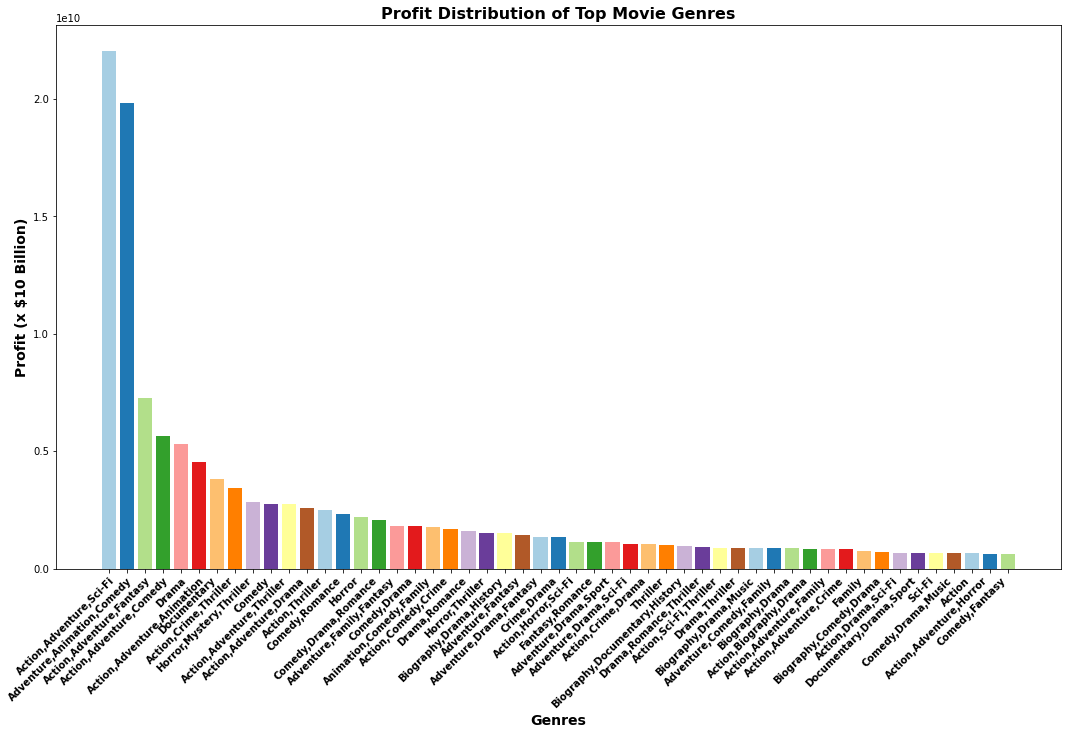

In [152]:
# Plot a bar chart of profit distribution for movie genres and genre groups

# Define the x (labels) and y (values) variables
labels= new_genre_df['genres']  
values= new_genre_df['profit'] 

# Define the plot size
plt.figure(figsize=(18, 10))

# Define the xticks, title, xlabels, and ylabels
plt.xticks(rotation=45, ha='right', va='top', rotation_mode='anchor', fontsize=10, fontweight= 'bold')
plt.title('Profit Distribution of Top Movie Genres', fontsize=16, fontweight='bold')
plt.xlabel('Genres', fontsize=14, fontweight='bold')
plt.ylabel('Profit (x $10 Billion)', fontsize=14, fontweight='bold')

# Create the color palette
palette = sns.color_palette("Paired")

# Plot the bar plot
plt.bar(labels, values, color= palette)

# Remove default metadata of the plot
plt.show()

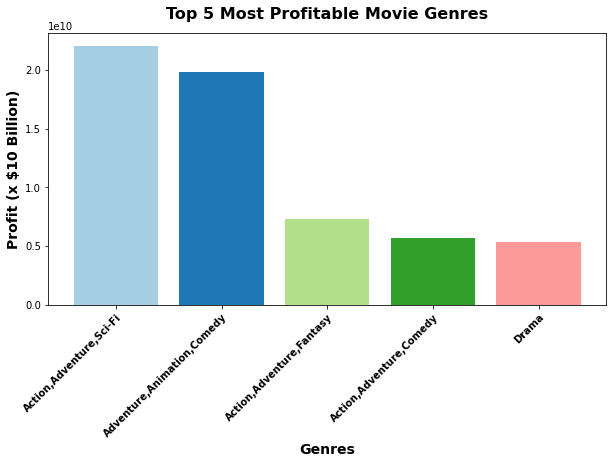

In [155]:
# Plot a bar chart of top 5 most profitable genre groups

# Define the x (labels) and y (values) variables
labels= new_genre_df['genres'][:5]
values= new_genre_df['profit'][:5]

# Define the plot size
plt.figure(figsize=(10, 5))

# Define the xticks, title, xlabels, and ylabels
plt.xticks(rotation=45, ha='right', va='top', 
           rotation_mode='anchor', fontsize=10, fontweight= 'bold')
plt.title('Top 5 Most Profitable Movie Genres', fontsize=16, fontweight='bold', y=1.03)
plt.xlabel('Genres', fontsize=14, fontweight='bold')
plt.ylabel('Profit (x $10 Billion)', fontsize=14, fontweight='bold')

# Create the color palette
palette = sns.color_palette("Paired")

# Plot the bar plot
plt.bar(labels, values, color= palette)

# Remove default metadata of the plot
plt.show()

### Explanation of the Profit Distribution of Top Movie Genres
1. The 2 most profitable genre groups, that is {Action, Adventure, Sci-Fi} and {Adventure, Animation, Comedy}, each raked in about \$20 billion in the year 2019.
2. The next 3 genres exceeded \$5 billion and they were: {Action, Adventure, Fantasy}, {Action, Adventure, Comedy}, and Drama.
3. Other genres appearing in the top 10 combinations include Documentary, Crime, Thriller, and Mystery.
4. The list of most profitable genres is dominated by genre combinations. This could mean that movies that fit in multiple genres are more profitable or the fact that more movies were produced in these genre combinations, leading to higher overall profits.
5. Except Documentary the trend of profitability closely matches the trend of genre popularity in IMDb Top 250 Movies dataset, where Drama, Adventure, Crime, Action, Comedy, Mystery, and Thriller are the seven most popular genres.

NB: I could not compute the correlation between popularity and profitability. This is because most movies fit into multiple genres and in such cases, I could not determine what proportion of a movie's profit can be attributed to a certain genre.

## SECTION IV

## PERFORMANCE EVALUATION OF MOVIE DIRECTORS
It makes business sense to hire the best people to implement your goals. 

Microsoft is a large multinational company with a market capitalization of $2.685 trillion as at 18th July, 2023, and therefore, they can and should hire the crème de la crème of the movie industry so that they can quickly grow a substantial market share.

According to Forbes, in most film production processes, the director defines and leads the vision, and is in charge of the whole creative and technical processes. They are responsible for hiring and/or managing the crew, cast, screenwriters, editors, designers, and all other creative participants and aspects of filmmaking.

Some directors also manage the production budget, while producers typically manage the logistics and business operations of the production.

It is therefore, clear that a director has the highest leverage on the success of a movie. 

I will therefore analyze and visualize the most productive and most profitable directors in the IMDb Top 250 Movies. Once Microsoft has found and engaged the best directors, they can leave them to hire the best of the other talents that form a team, since this can be highly subject to emotional and creative connection and not only productivity. 

### PROBLEM STATEMENT

To find out the best talent in the movie industry, I wish to find out the following:
1. Who are the most productive directors in the IMDb Top 250 Movies?
2. Which diretors have raked in the highest total profits from the movies they have directed in the IMDb Top 250 Movies?
3. What is the correlation between the number of movies a director has produced and the total profit his or her movies have garnered?

### EXPLORATORY DATA ANALYSIS OF THE IMDb TOP 250 MOVIES DATASET

In [156]:
# Print the first 5 rows of top_250_movies_df
top_250_movies_df.head()

,id,name,year,imbd_votes,imdb_rating,certificate,duration,genre,cast_id,cast_name,director_id,director_name,writter_name,writter_id,img_link
rank,,,,,,,,,,,,,,,
1,tt0111161,The Shawshank Redemption,1994,2601152,9.3,A,142,Drama,"nm0000209,nm0000151,nm0348409,nm0006669,nm0000...","Tim Robbins,Morgan Freeman,Bob Gunton,William ...",nm0001104,Frank Darabont,"Stephen King,Frank Darabont","nm0000175,nm0001104",https://m.media-amazon.com/images/M/MV5BMDFkYT...
2,tt0068646,The Godfather,1972,1796656,9.2,A,175,"Crime,Drama","nm0000008,nm0000199,nm0001001,nm0000473,nm0144...","Marlon Brando,Al Pacino,James Caan,Diane Keato...",nm0000338,Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola","nm0701374,nm0000338",https://m.media-amazon.com/images/M/MV5BM2MyNj...
3,tt0468569,The Dark Knight,2008,2572662,9.0,UA,152,"Action,Crime,Drama","nm0000288,nm0005132,nm0001173,nm0000323,nm0350...","Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",nm0634240,Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer","nm0634300,nm0634240,nm0275286",https://m.media-amazon.com/images/M/MV5BMTMxNT...
4,tt0071562,The Godfather Part II,1974,1237934,9.0,A,202,"Crime,Drama","nm0000199,nm0000134,nm0000380,nm0000473,nm0001...","Al Pacino,Robert De Niro,Robert Duvall,Diane K...",nm0000338,Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo","nm0000338,nm0701374",https://m.media-amazon.com/images/M/MV5BMWMwMG...
5,tt0050083,12 Angry Men,1957,768548,9.0,U,96,"Crime,Drama","nm0000020,nm0002011,nm0000842,nm0275835,nm0550...","Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",nm0001486,Sidney Lumet,Reginald Rose,nm0741627,https://m.media-amazon.com/images/M/MV5BMWU4N2...


In [157]:
# Print the first 5 rows of top_250_movies_df
top_250_movies_df.tail()

,id,name,year,imbd_votes,imdb_rating,certificate,duration,genre,cast_id,cast_name,director_id,director_name,writter_name,writter_id,img_link
rank,,,,,,,,,,,,,,,
246,tt15097216,Jai Bhim,2021,190981,8.9,A,164,"Crime,Drama,Mystery","nm1421814,nm7934649,nm8904193,nm8135195,nm0695...","Suriya,Lijo Mol Jose,Manikandan K.,Rajisha Vij...",nm4377096,T.J. Gnanavel,"T.J. Gnanavel,Rajendra Sapre","nm4377096,nm13222819",https://m.media-amazon.com/images/M/MV5BYzgwOD...
247,tt0103639,Aladdin,1992,406751,8.0,U,90,"Animation,Adventure,Comedy","nm0918334,nm0000245,nm0488306,nm0293455,nm0919...","Scott Weinger,Robin Williams,Linda Larkin,Jona...","nm0166256,nm0615780","Ron Clements,John Musker","Ron Clements,John Musker,Ted Elliott","nm0166256,nm0615780,nm0254645",https://m.media-amazon.com/images/M/MV5BMTM5OT...
248,tt0083987,Gandhi,1982,228938,8.1,U,191,"Biography,Drama","nm0001426,nm0000024,nm0368990,nm0786022,nm0000...","Ben Kingsley,John Gielgud,Rohini Hattangadi,Ro...",nm0000277,Richard Attenborough,John Briley,nm0109300,https://m.media-amazon.com/images/M/MV5BY2Q2ND...
249,tt1454029,The Help,2011,451856,8.1,UA,146,Drama,"nm1297015,nm0205626,nm0818055,nm0397171,nm1567...","Emma Stone,Viola Davis,Octavia Spencer,Bryce D...",nm0853238,Tate Taylor,"Tate Taylor,Kathryn Stockett","nm0853238,nm3543826",https://m.media-amazon.com/images/M/MV5BOGVmZG...
250,tt0101414,Beauty and the Beast,1991,445617,8.0,U,84,"Animation,Family,Fantasy","nm0641314,nm0000913,nm0181425,nm0263591,nm0001...","Paige O'Hara,Robby Benson,Jesse Corti,Rex Ever...","nm0873779,nm0936374","Gary Trousdale,Kirk Wise","Linda Woolverton,Brenda Chapman,Chris Sanders","nm0941314,nm0152312,nm0761498",https://m.media-amazon.com/images/M/MV5BNjk1Nj...


In [158]:
# Examine the count of unique values
top_250_movies_df['director_name'].value_counts()

Akira Kurosawa                   7
Stanley Kubrick                  7
Christopher Nolan                7
Steven Spielberg                 7
Martin Scorsese                  7
                                ..
Paul Thomas Anderson             1
François Truffaut                1
Olivier Nakache,Éric Toledano    1
Henri-Georges Clouzot            1
Stanley Kramer                   1
Name: director_name, Length: 161, dtype: int64

An observation of the director_name column shows that some movies were produced by a team of two or more directors. The count of unique directors reveals that some directors such as Steven Spielberg have produced multiple top-rated movies.

I will therefore, first split the directors who teamed up for a movie and then create a dataframe showing the count of top-rated movies each director has produced. 

I will then plot a bar chart to show the most productive directors.

In [159]:
# Iterate over the director_name column, split comma-separated names, 
# and append an empty dictionary with the count of each name

# Recall the function split_string(lumped_string_df, column),
# that iterates over a column of strings in a dataframe, 
# splits comma separated strings, and appends an empty dictionary 
# with the count of each string

# Define parameter values
lumped_string_df = top_250_movies_df
column = 'director_name'

# Create and convert a sorted list of tuples to a dataframe
top_rated_diretors_df = pd.DataFrame(sorted(split_string(lumped_string_df, column).items(), 
                                            key=lambda x: x[1], reverse=True))
# Rename the column names
top_rated_diretors_df.columns =['director_name', 'num_of_movies']

# Print the first 15 values of the dataframe
top_rated_diretors_df.head(15)

,director_name,num_of_movies
0,Christopher Nolan,7
1,Steven Spielberg,7
2,Martin Scorsese,7
3,Akira Kurosawa,7
4,Stanley Kubrick,7
5,Alfred Hitchcock,6
6,Quentin Tarantino,5
7,Charles Chaplin,5
8,Billy Wilder,5
9,Sergio Leone,4


### DATA VISUALIZATION OF THE MOST PRODUCTIVE DIRECTORS IN IMDb TOP 250 MOVIES

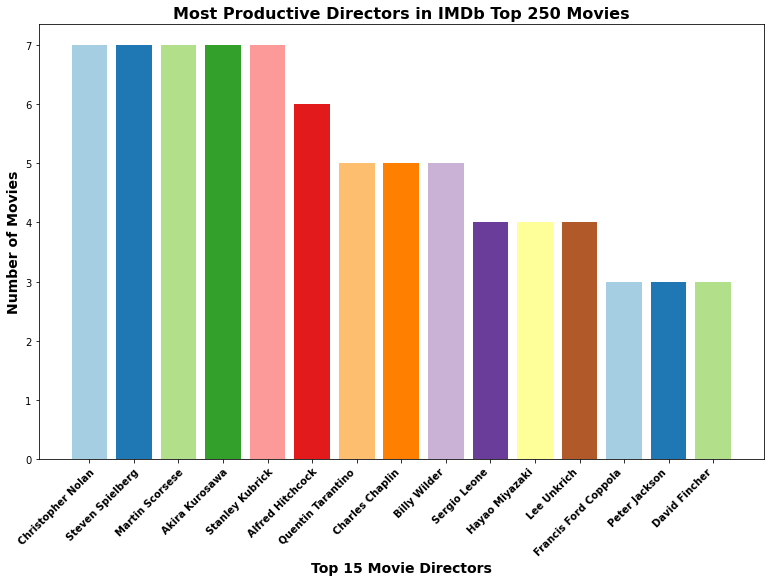

In [160]:
# Plot a bar chart of top 15 most productive movie directors

# Define the labels and values
labels = top_rated_diretors_df['director_name'].head(15)
values = top_rated_diretors_df['num_of_movies'].head(15)

# Define the size of the figure
plt.figure(figsize=(13, 8))

# Define xticks, yticks, xlabels, and ylabels
plt.xticks(rotation=45, ha='right', va='top', rotation_mode='anchor', fontsize=10, fontweight= 'bold')
plt.title('Most Productive Directors in IMDb Top 250 Movies', fontsize=16, fontweight='bold')
plt.xlabel('Top 15 Movie Directors', fontsize=14, fontweight='bold')
plt.ylabel('Number of Movies', fontsize=14, fontweight='bold')

# Create the color palette
palette = sns.color_palette("Paired")

# Create the bar plot
plt.bar(labels, values, color= palette)

# Remove default meta details of the plot
plt.show()

### Explanation of Productivity Distribution of Top-Rated Directors
The top five directors in the IMDb Top 250 Movies each have 7 movies to their name. 

The last three directors in the top 15 list have each directed 3 movies.

### DATA ANALYSIS OF THE MOST PROFITABLE DIRECTORS IN IMDb TOP 250 MOVIES

The dataframe top_250_movies_df doesn't have data about the profitability of the movies. 
To obtain the latest data about box office profitability of top-rated movies, I'm going to scrape the data from this BOM page:- __[Top Lifetime Grosses](https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?area=XWW)__.

The process is taking some time to complete but at the end it is scraping what we want and will help us find out which directors produced the most profitable movies.

In [3]:
# HTTP request code to scrape data from Box Office Mojo

# Import the relevant libraries
import requests
from bs4 import BeautifulSoup
import time

# Set the initial URL to be scraped
url = 'https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?area=XWW'

# Set the base URL to be used to complete the different URLs needed
BASE_URL = 'https://www.boxofficemojo.com'

# The website has 200 results per page
RESULTS_PER_PAGE = 200

# Define a function for scraping the budget, which is on
# a movie's individual page
def get_budget(movie_url):
    response = requests.get(movie_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    budget_element = soup.find('span', text='Budget')
    if budget_element:
        budget = budget_element.find_next('span').text.strip()
        return budget
    return 'N/A'
    
# Define empty lists for title, gross, year, and budget values
titles = []
grosses = []
years = []
budgets = []

# Increment an offset parameter by 200, since each page has 200 results
for offset in range(0, 1000, RESULTS_PER_PAGE):
    page_url = url + f'&offset={offset}'
    response = requests.get(page_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table', {'class': 
                                'a-bordered a-horizontal-stripes a-size-base a-span12 mojo-body-table mojo-table-annotated'
                               })
    # Iterate over the rows in <table></table> tag
    for row in table.find_all('tr')[1:]:
        # Get the values in title, worldwide lifetime gross,
        # and year columns in each row
        columns = row.find_all('td')
        title_column = columns[1].find('a')
        title = title_column.text.strip()
        gross = columns[2].text.strip()
        year = columns[7].text.strip()

        # Define the URL for the movie's individual page
        # and scrape the budget data
        movie_url = BASE_URL + title_column['href']
        budget = get_budget(movie_url)

        # Append the respective lists
        titles.append(title)
        grosses.append(gross)
        years.append(year)
        budgets.append(budget)

        #Delay the start of each cycle by 0.1 sec
        time.sleep(0.1)

# Add the lists values to a dictionary named data, each value at the corresponding key
data = {
    'Title': titles,
    'Worldwide Lifetime Gross': grosses,
    'Year': years,
    'Budget': budgets
}
# Convert the data to a dictionary 
BOM_1000_movies_df = pd.DataFrame(data)

# Print the first 5 rows of the dataframe
BOM_1000_movies_df.head()

,Title,Worldwide Lifetime Gross,Year,Budget
0,Avatar,"$2,923,706,026",2009,"$237,000,000"
1,Avengers: Endgame,"$2,799,439,100",2019,"$356,000,000"
2,Avatar: The Way of Water,"$2,320,250,281",2022,N/A
3,Titanic,"$2,264,743,305",1997,"$200,000,000"
4,Star Wars: Episode VII - The Force Awakens,"$2,071,310,218",2015,"$245,000,000"


In [5]:
# Saving the dataframe in my repository
BOM_1000_movies_df.to_csv('BOM_1000_movies.csv')

### DATA UNDERSTANDING OF BOM_1000_movies_df

In [6]:
# Print the first 5 rows of the dataframe
BOM_1000_movies_df.head()

,Title,Worldwide Lifetime Gross,Year,Budget
0,Avatar,"$2,923,706,026",2009,"$237,000,000"
1,Avengers: Endgame,"$2,799,439,100",2019,"$356,000,000"
2,Avatar: The Way of Water,"$2,320,250,281",2022,N/A
3,Titanic,"$2,264,743,305",1997,"$200,000,000"
4,Star Wars: Episode VII - The Force Awakens,"$2,071,310,218",2015,"$245,000,000"


In [7]:
# Print the last 5 rows of the dataframe
BOM_1000_movies_df.tail()

,Title,Worldwide Lifetime Gross,Year,Budget
995,The Dictator,"$179,379,533",2012,"$65,000,000"
996,The League of Extraordinary Gentlemen,"$179,265,204",2003,"$78,000,000"
997,Allegiant,"$179,246,868",2016,N/A
998,Daredevil,"$179,179,718",2003,"$78,000,000"
999,City Slickers,"$179,033,791",1991,"$27,000,000"


In [8]:
# Examine the schema and data types
BOM_1000_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Title                     1000 non-null   object
 1   Worldwide Lifetime Gross  1000 non-null   object
 2   Year                      1000 non-null   object
 3   Budget                    1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [9]:
#Examine the number of missing values
BOM_1000_movies_df.isna().sum()

Title                       0
Worldwide Lifetime Gross    0
Year                        0
Budget                      0
dtype: int64

### DATA CLEANING OF BOM_1000_movies_df
Cleaning this dataset will first involve replacing the placeholder values in the budget column with a measure of central tendency.

It will also involve stripping the values in Worldwide Lifetime Gross and Budget of the dollar ($) sign and converting them to the float datatype.

I will first filter the placeholder values in the budget column and calculate a measure of central tendency.

In [10]:
# Print the rows with placeholder budget values
BOM_1000_movies_df[BOM_1000_movies_df['Budget'] == 'N/A']

,Title,Worldwide Lifetime Gross,Year,Budget
2,Avatar: The Way of Water,"$2,320,250,281",2022,N/A
5,Avengers: Infinity War,"$2,052,415,039",2018,N/A
6,Spider-Man: No Way Home,"$1,921,847,111",2021,N/A
11,Top Gun: Maverick,"$1,495,696,292",2022,N/A
14,Black Panther,"$1,349,926,083",2018,N/A
...,...,...,...,...
983,Cliff Walkers,"$181,325,565",2021,N/A
984,Scooby-Doo 2: Monsters Unleashed,"$181,239,132",2004,N/A
993,M3gan,"$179,842,338",2022,N/A
994,Dangerous Minds,"$179,519,401",1995,N/A


In [24]:
# Create a new dataframe where placeholder budget values have been filtered
BOM_filtered_movies_df = BOM_1000_movies_df[BOM_1000_movies_df['Budget'] != 'N/A']

# Print the first 5 rows
BOM_filtered_movies_df.head()

,Title,Worldwide Lifetime Gross,Year,Budget
0,Avatar,"$2,923,706,026",2009,"$237,000,000"
1,Avengers: Endgame,"$2,799,439,100",2019,"$356,000,000"
3,Titanic,"$2,264,743,305",1997,"$200,000,000"
4,Star Wars: Episode VII - The Force Awakens,"$2,071,310,218",2015,"$245,000,000"
7,Jurassic World,"$1,671,537,444",2015,"$150,000,000"


In [27]:
# Use .replace() method to remove all occurences of , and $ signs
# Convert the values to numeric (float) type
BOM_filtered_movies_df.loc[:, 'Worldwide Lifetime Gross'] = BOM_filtered_movies_df['Worldwide Lifetime Gross'].str.replace(',', '').str.replace('$', '').astype(float)
BOM_filtered_movies_df.loc[:, 'Budget'] = BOM_filtered_movies_df['Budget'].str.replace(',', '').str.replace('$', '').astype(float)

# Print the first 5 rows
BOM_filtered_movies_df.head()

C:\Users\USER PC\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\USER PC\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Title,Worldwide Lifetime Gross,Year,Budget
0,Avatar,2.923706e+09,2009,237000000.0
1,Avengers: Endgame,2.799439e+09,2019,356000000.0
3,Titanic,2.264743e+09,1997,200000000.0
4,Star Wars: Episode VII - The Force Awakens,2.071310e+09,2015,245000000.0
7,Jurassic World,1.671537e+09,2015,150000000.0


In [28]:
# Explore the basic statistics 
BOM_filtered_movies_df.describe()

,Worldwide Lifetime Gross,Budget
count,7.710000e+02,7.710000e+02
mean,4.244107e+08,9.721566e+07
std,2.981112e+08,6.056306e+07
min,1.790338e+08,1.500000e+04
25%,2.324951e+08,5.000000e+07
50%,3.252866e+08,8.500000e+07
75%,4.932634e+08,1.400000e+08
max,2.923706e+09,3.560000e+08


### VISUALIZATION OF BUDGET DISTRIBUTION AMONG TOP-RATED MOVIES WHERE ROWS WITH MISSING BUDGETS HAVE BEEN FILTERED

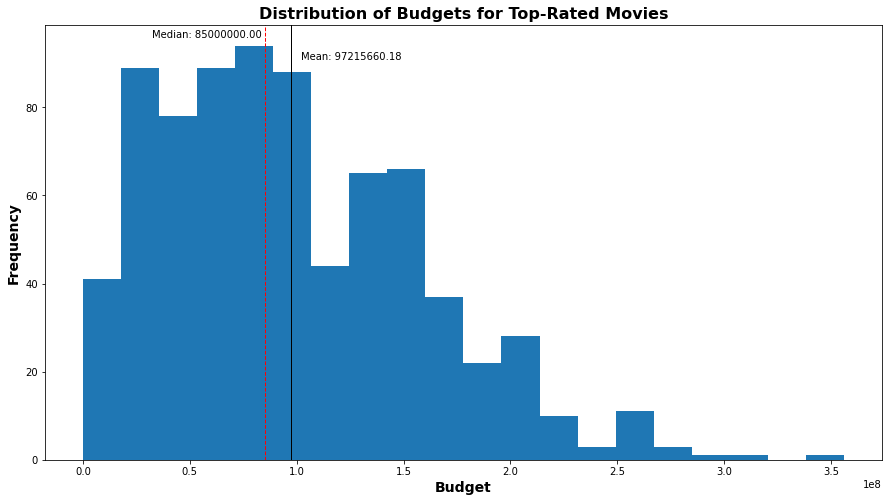

In [34]:
# Define the figure and size
fig, ax = plt.subplots(figsize=(15, 8))

# Define the variable
x = BOM_filtered_movies_df['Budget']

# Plot the histogram
ax.hist(x, bins=20)
ax.set_xlabel("Budget", fontsize=14, fontweight='bold')
ax.set_ylabel("Frequency", fontsize=14, fontweight='bold')

# Define and style the Mean and Median Lines
plt.axvline(x.mean(), color='k', linestyle='-', linewidth=1)
plt.axvline(x.median(), color='r', linestyle='--', linewidth=1)

# Plot the mean and median lines
min_ylim, max_ylim = plt.ylim()
plt.text(x.mean()*1.05, max_ylim*0.92, 'Mean: {:.2f}'.format(x.mean()))
plt.text(x.median()*0.38, max_ylim*0.97, 'Median: {:.2f}'.format(x.median()))

# Set the title
ax.set_title("Distribution of Budgets for Top-Rated Movies", fontsize=16, fontweight='bold');

The budget distribution is left-skewed, and therefore, I will replace the placeholder budget values in movie_profitability_df with the median budget, because the median is less susceptible to an asymmetric distribution.

In [36]:
# Replace placeholder budget values with median budget
BOM_1000_movies_df['Budget'] = BOM_1000_movies_df['Budget'].replace('N/A', 85000000)

In [130]:
# Inner merge of merged_gross_and_budgets_df and movie_basics_df 
movie_profitability_df = top_250_movies_df.merge(BOM_1000_movies_df, left_on='name', 
                                                   right_on='Title', how='inner')
# Print the first 5 values 
movie_profitability_df.head()

,id,name,year,imbd_votes,imdb_rating,certificate,duration,genre,cast_id,cast_name,director_id,director_name,writter_name,writter_id,img_link,Title,Worldwide Lifetime Gross,Year,Budget
0,tt0068646,The Godfather,1972,1796656,9.2,A,175,"Crime,Drama","nm0000008,nm0000199,nm0001001,nm0000473,nm0144...","Marlon Brando,Al Pacino,James Caan,Diane Keato...",nm0000338,Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola","nm0701374,nm0000338",https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,"$250,341,816",1972,"$6,000,000"
1,tt0468569,The Dark Knight,2008,2572662,9.0,UA,152,"Action,Crime,Drama","nm0000288,nm0005132,nm0001173,nm0000323,nm0350...","Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",nm0634240,Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer","nm0634300,nm0634240,nm0275286",https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,"$1,006,234,167",2008,"$185,000,000"
2,tt0108052,Schindler's List,1993,1322917,9.0,A,195,"Biography,Drama,History","nm0000553,nm0000146,nm0001426,nm0328751,nm0755...","Liam Neeson,Ralph Fiennes,Ben Kingsley,Carolin...",nm0000229,Steven Spielberg,"Thomas Keneally,Steven Zaillian","nm0447745,nm0001873",https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,"$322,161,245",1993,"$22,000,000"
3,tt0167260,The Lord of the Rings: The Return of the King,2003,1786498,9.0,U,201,"Action,Adventure,Drama","nm0000704,nm0001557,nm0005212,nm0089217,nm0032...","Elijah Wood,Viggo Mortensen,Ian McKellen,Orlan...",nm0001392,Peter Jackson,"J.R.R. Tolkien,Fran Walsh,Philippa Boyens","nm0866058,nm0909638,nm0101991",https://m.media-amazon.com/images/M/MV5BOGM4ZT...,The Lord of the Rings: The Return of the King,"$1,147,633,833",2003,"$94,000,000"
4,tt0110912,Pulp Fiction,1994,1993957,8.9,A,154,"Crime,Drama","nm0000237,nm0000235,nm0000168,nm0000246,nm0000...","John Travolta,Uma Thurman,Samuel L. Jackson,Br...",nm0000233,Quentin Tarantino,"Quentin Tarantino,Roger Avary","nm0000233,nm0000812",https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,"$213,928,762",1994,"$8,000,000"


In [47]:
# Use .replace() method to remove all occurences of , and $ signs
# Convert the values to numeric (integer) type
movie_profitability_df['Worldwide Lifetime Gross'] = movie_profitability_df['Worldwide Lifetime Gross'].str.replace(',', '').str.replace('$', '').astype(float)
movie_profitability_df['Budget'] = movie_profitability_df['Budget'].str.replace(',', '').str.replace('$', '').astype(float)

In [97]:
# Create a column for profits
movie_profitability_df['Profit'] = movie_profitability_df['Worldwide Lifetime Gross'] - movie_profitability_df['Budget']

# Print the first 5 rows
movie_profitability_df.head()

,id,name,year,imbd_votes,imdb_rating,certificate,duration,genre,cast_id,cast_name,director_id,director_name,writter_name,writter_id,img_link,Title,Worldwide Lifetime Gross,Year,Budget,Profit
0,tt0068646,The Godfather,1972,1796656,9.2,A,175,"Crime,Drama","nm0000008,nm0000199,nm0001001,nm0000473,nm0144...","Marlon Brando,Al Pacino,James Caan,Diane Keato...",nm0000338,Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola","nm0701374,nm0000338",https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,2.503418e+08,1972,6000000.0,2.443418e+08
1,tt0468569,The Dark Knight,2008,2572662,9.0,UA,152,"Action,Crime,Drama","nm0000288,nm0005132,nm0001173,nm0000323,nm0350...","Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",nm0634240,Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer","nm0634300,nm0634240,nm0275286",https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,1.006234e+09,2008,185000000.0,8.212342e+08
2,tt0108052,Schindler's List,1993,1322917,9.0,A,195,"Biography,Drama,History","nm0000553,nm0000146,nm0001426,nm0328751,nm0755...","Liam Neeson,Ralph Fiennes,Ben Kingsley,Carolin...",nm0000229,Steven Spielberg,"Thomas Keneally,Steven Zaillian","nm0447745,nm0001873",https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,3.221612e+08,1993,22000000.0,3.001612e+08
3,tt0167260,The Lord of the Rings: The Return of the King,2003,1786498,9.0,U,201,"Action,Adventure,Drama","nm0000704,nm0001557,nm0005212,nm0089217,nm0032...","Elijah Wood,Viggo Mortensen,Ian McKellen,Orlan...",nm0001392,Peter Jackson,"J.R.R. Tolkien,Fran Walsh,Philippa Boyens","nm0866058,nm0909638,nm0101991",https://m.media-amazon.com/images/M/MV5BOGM4ZT...,The Lord of the Rings: The Return of the King,1.147634e+09,2003,94000000.0,1.053634e+09
4,tt0110912,Pulp Fiction,1994,1993957,8.9,A,154,"Crime,Drama","nm0000237,nm0000235,nm0000168,nm0000246,nm0000...","John Travolta,Uma Thurman,Samuel L. Jackson,Br...",nm0000233,Quentin Tarantino,"Quentin Tarantino,Roger Avary","nm0000233,nm0000812",https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,2.139288e+08,1994,8000000.0,2.059288e+08


### DATA VISUALIZATION OF PROFIT DISTRIBUTION FOR MOVIE DIRECTOR PAIRS & TRIOS

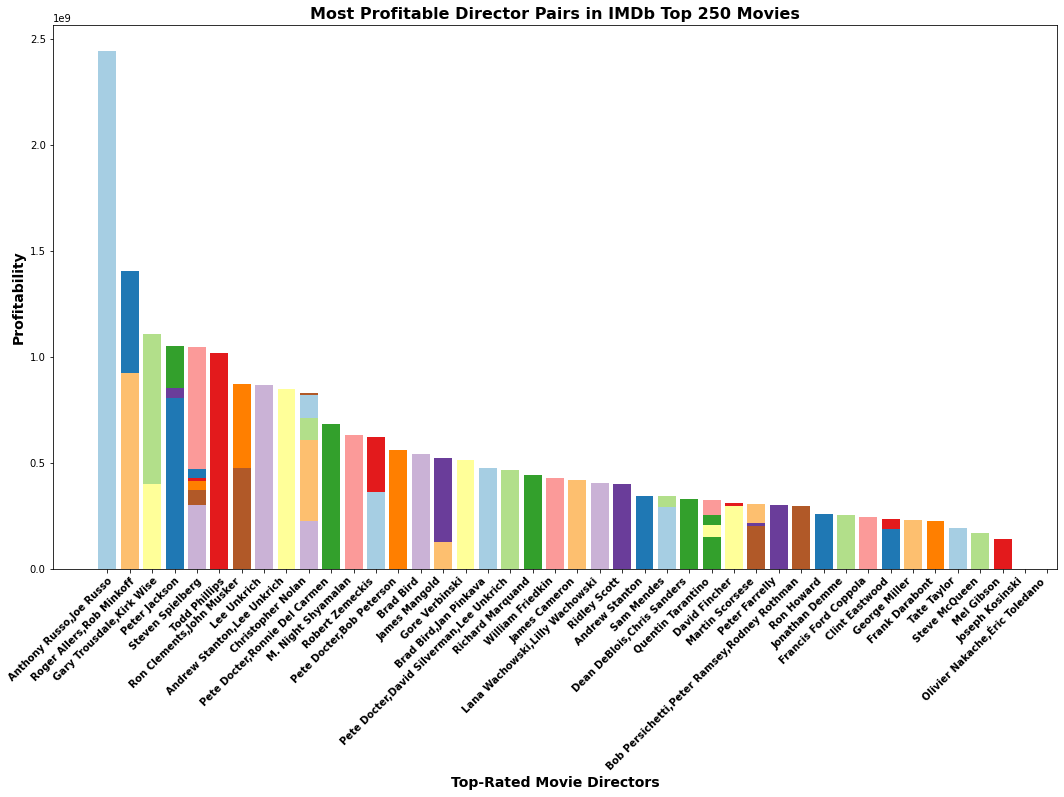

In [101]:
# Plot a bar chart of top 15 most profitable movie director-pairs

# Sort the dataframe by profit in descending order
movie_profitability_df = movie_profitability_df.sort_values(by='Profit', ascending=False)

# Define x (labels) and y (values) variables 
labels= movie_profitability_df['director_name']  #[x[0] for x in top_15_directors]
values= movie_profitability_df['Profit']  #[x[1] for x in top_15_directors]

# Define the figure size
plt.figure(figsize=(18, 10))

# Plot the xticks, title, xlabels, ylabels
plt.xticks(rotation=45, ha='right', va='top', rotation_mode='anchor', fontsize=10, fontweight= 'bold')
plt.title('Most Profitable Director Pairs in IMDb Top 250 Movies', fontsize=16, fontweight='bold')
plt.xlabel('Top-Rated Movie Directors', fontsize=14, fontweight='bold')
plt.ylabel('Profitability', fontsize=14, fontweight='bold')

# Set the color palette
palette = sns.color_palette("Paired")

# Plot the bar plot
plt.bar(labels, values, color= palette)

# Remove default meta details of the plot
plt.show()

The bar chart above shows some movie directors produced more profitable movies than others. 

The stacked bars also show that some diretors were involved in multiple movies as a pair or trio.

Since some movies were directed by two or more directors, to find the profit for each director, I will split the total profit for a movie among the directors, then explode the dataframe to create a separate row for each director.

In [106]:
#Create a copy of the DataFrame with split profits for a set of directors
df_split_profit = movie_profitability_df.copy()
df_split_profit['director_name'] = df_split_profit['director_name'].str.split(',')
df_split_profit['Profit'] = df_split_profit.apply(lambda row: row['Profit'] / 
                                                  len(row['director_name']), axis=1)

# Explode the directors column to create separate rows for each director
df_exploded = df_split_profit.explode('director_name')

# Group by director and calculate the total profit for each director
director_profit_df = df_exploded.groupby('director_name').sum().reset_index()
director_profit_df

# Drop irrelevant columns and sort by profit
director_profit_df.drop(labels=['year', 'Worldwide Lifetime Gross', 'Budget'], axis=1, inplace=True)
director_profit_df.sort_values(by='Profit', ascending=False, inplace=True)

# Print the dataframe
director_profit_df.head()

,director_name,imbd_votes,imdb_rating,Profit
57,Steven Spielberg,6856240,58.6,3.327037e+09
7,Christopher Nolan,9693947,43.0,3.195300e+09
41,Peter Jackson,5207508,26.6,2.712783e+09
31,Lee Unkrich,3210821,33.0,1.446038e+09
2,Anthony Russo,2091326,16.8,1.221720e+09
23,Joe Russo,2091326,16.8,1.221720e+09
47,Rob Minkoff,2060802,17.0,1.163294e+09
50,Roger Allers,2060802,17.0,1.163294e+09
59,Todd Phillips,1205044,8.4,1.019458e+09
48,Robert Zemeckis,3177505,17.3,9.875632e+08


In [112]:
director_profit_df.tail()

,director_name,imbd_votes,imdb_rating,Profit
24,John Lasseter,969469,8.3,0.0
19,Gus Van Sant,942633,8.3,0.0
16,George Cukor,311407,8.2,0.0
11,David Yates,851508,8.1,0.0
62,Éric Toledano,836025,8.5,0.0


In [116]:
# Drop rows where the profit is zero
director_profit_df.drop(director_profit_df[director_profit_df['Profit'] == 0].index, inplace=True)

### DATA VISUALIZATION OF PROFIT DISTRIBUTION FOR EACH MOVIE DIRECTOR IN IMDb TOP 250 MOVIES

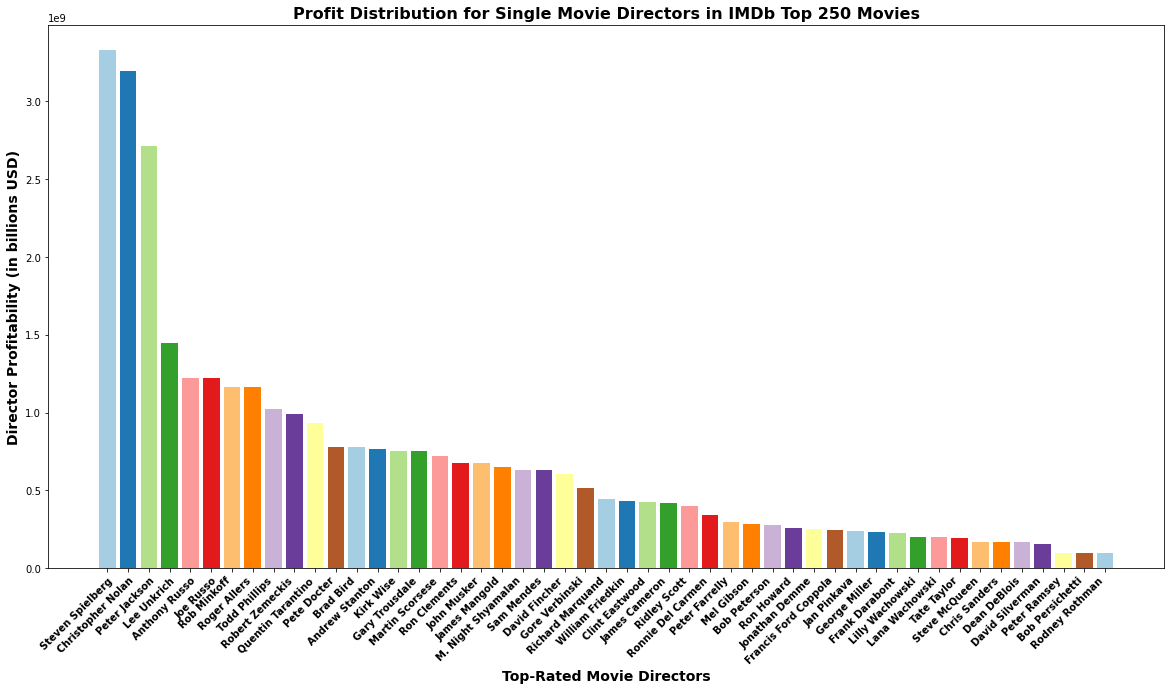

In [119]:
# Plot a bar chart of profit distribution by director

# Define x (labels) and y (values) variables 
labels= director_profit_df['director_name']
values= director_profit_df['Profit']

# Define the figure size
plt.figure(figsize=(20, 10))

# Plot the xticks, title, xlabels, ylabels
plt.xticks(rotation=45, ha='right', va='top', rotation_mode='anchor', fontsize=10, fontweight= 'bold')
plt.title('Profit Distribution for Single Movie Directors in IMDb Top 250 Movies', fontsize=16, fontweight='bold')
plt.xlabel('Top-Rated Movie Directors', fontsize=14, fontweight='bold')

plt.ylabel('Director Profitability (in billions USD)', fontsize=14, fontweight='bold')

# Create the color palette
palette = sns.color_palette("Paired")

# Create the bar plot
plt.bar(labels, values, color= palette)

# Remove default metadata for the plot
plt.show()

### EXPLANATION OF THE GRAPH OF PROFIT DISTRIBUTION BY DIRECTOR
The bar chart of profit per director shows that some directors are by far more profitable than others.
The first three directors have each directed movies that have garnered a total profit that exceeds 2.5 billion dollars. These are:
1. Steven Spielberg
2. Christopher Nolan
3. Peter Jackson

The next seven directors have exceeded 1 billion dollars in total profit. These are:

4. Lee Unkrich
5. Antony Russo
6. Joe Russo
7. Rob Minkoff
8. Rogers Allers
9. Todd Phillips
10. Robert Zemecks

About half of the directors have directed movies that have garnered less than $500 million.

We can also notice that some of the most productive directors have also directed the highest number of movies. These include Steven Spielberg and Christopher Nolan. 

However, there are also profitable directors who have directed a small number of top-rated movies. These include Peter Jackson, Antony Russo, and Joe Russo, who have each directed 3, 2, and 2 movies respectively.

I will therefore, find the correlation between number of top-rated movies and profitability for a director, to find out whether experience counts significantly.


### CORRELATION BETWEEN NUMBER OF MOVIES AND TOTAL PROFIT FOR A DIRECTOR

In [127]:
# Inner merge of director_profit_df and top_rated_diretors_df
director_profit_n_movies_df = director_profit_df.merge(top_rated_diretors_df, left_on='director_name', 
                                                   right_on='director_name', how='inner')
# Print the first 5 rows
director_profit_n_movies_df.head()

,director_name,imbd_votes,imdb_rating,Profit,num_of_movies
0,Steven Spielberg,6856240,58.6,3.327037e+09,7
1,Christopher Nolan,9693947,43.0,3.195300e+09,7
2,Peter Jackson,5207508,26.6,2.712783e+09,3
3,Lee Unkrich,3210821,33.0,1.446038e+09,4
4,Anthony Russo,2091326,16.8,1.221720e+09,2


In [128]:
# Find correlation between number of movies and profits
director_profit_n_movies_df['num_of_movies'].corr(director_profit_n_movies_df['Profit']) 

0.6630078603318517

### VISUALIZATION OF THE CORRELATION BETWEEN NUMBER OF MOVIES AND TOTAL PROFIT PER DIRECTOR

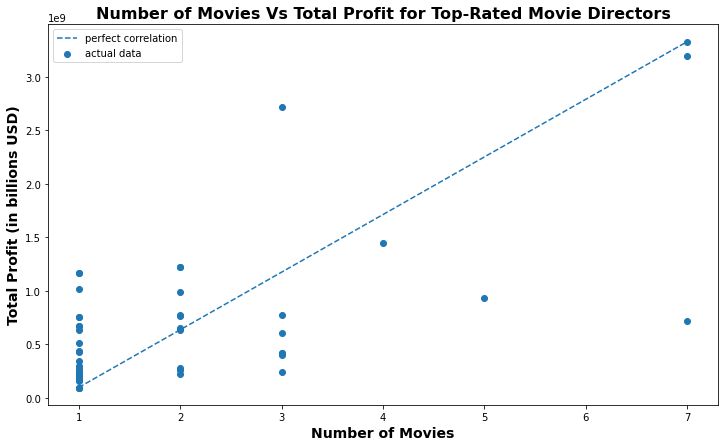

In [129]:
# Plot a scatter plot of profit against number of movies for a director

# Define the figure, axis, and figure size
fig, ax = plt.subplots(figsize=(12,7))

# Create the scatter plot
ax.scatter(director_profit_n_movies_df['num_of_movies'], 
           director_profit_n_movies_df['Profit'], label="actual data")

# Define the x and y axes limits
x_bounds = [min(director_profit_n_movies_df['num_of_movies']), 
            max(director_profit_n_movies_df['num_of_movies'])]
y_bounds = [min(director_profit_n_movies_df['Profit']), 
            max(director_profit_n_movies_df['Profit'])]

# Plot the line of perfect correlation
ax.plot(x_bounds, y_bounds, "--", label="perfect correlation")

# Define the title, xlabels, and ylabels
ax.set_title("Number of Movies Vs Total Profit for Top-Rated Movie Directors", 
             fontsize=16, fontweight='bold')
ax.set_xlabel("Number of Movies", fontsize=14, fontweight='bold')
ax.set_ylabel("Total Profit (in billions USD)", fontsize=14, fontweight='bold')

# Plot the legend
ax.legend();

Research shows that correlation coefficients whose magnitude are between 0.5 and 0.7 indicate moderate correlation. 
The correlation between the number of movies a director has directed and the total profit margin is 0.6630078603318517.

Therefore, there is moderate likelihood that a director with a high number of movies may direct a movie that realizes a high profit margin.

Therefore, Microsoft may choose to engage all high-profit directors regardless of the number of movies they have directed, since there is almost equal likelihood of any of them garnering a high profit.

## CONCLUSION

The box office revenue runs into the billions of dollars and is expected to continue growing at an annual rate of 8.3% up to 2027.

It's evident that some genres are more popular than others, with **Documentary**, **Drama**, and **Comedy** each having more than twice the number of movies in any of the other genres. However, a comparison with the genre distribution among IMDb's Top 250 movies list shows that genres such as **Adventure**, **Crime**, and **Action** are popular but not crowded by producers.

Movies that fit the **genre set of Action, Adventure & Sci-Fi** led the pack with a total profit of about **\\$22.05 billion**. Only the first 5 genre groups exceeded \\$5 billion in total profits, so the dominance of certain genres is evident.

The three most profitable movie studios are **BV (Buena Vista Studios)**, **Uni. (Universal Studios)**, and **Fox Studios**, each raking in about **20 billion dollars** in profits. All studios below position 10 made less than 2 billion dollars (less than 10% of the 2 top ranking studios), which shows the dominance of BV (Buena Vista Studios), and Uni. (Universal Studios).

Some movie directors are more productive and/or profitable than others, but the **correlation between productivity and profitability is about 0.6630**, indicating a moderate correlation.

## MOVIE STUDIO BUSINESS RECOMMENDATIONS FOR MICROSOFT

1. The fact that Microsoft wants to succeed in movie production doesn’t mean that they should jump into what everyone is doing, whether they’re succeeding or not.

2. It is evident that some genres are most popular than others, and the top five, including Drama, Adventure, Crime, Action, and Comedy are evidently dominant both in terms of popularity and profitability. I recommend them as the best targets for Microsoft as a beginner studio.

3. Competitor analysis of the most profitable movie studios reveals that the market has a few dominant studios, which include BV (Buena Vista Studios), Universal Studios, Fox Studios, WB (Warners Bros), and Sony. The first two, BV and Universal, each made 10 times more profit than any other studio in position 6 and beyond. 

    I therefore urge Microsoft to conduct further analysis of these top studios, including their technology, marketing strategies, and SWOT analysis. 

4. Further analysis of **BV Studio** shows that it **made an average profit of about \\$567 million per genre** (or genre group). Microsoft being a much larger company than BV, I propose that it should **aim to exceed** these profit margins by targeting at least **\\$600 million profit per genre**.

5. When it comes to hiring the best talent in the movie industry, Microsoft should focus more on hunting down the best director the world can offer. This is because directors are the life of the movie. They manage all creative and technical aspects of a movie production process, and some go as far as handling administrative and logistical work. Directors are also responsible for hiring almost all the other team members except the producer, and so once a top-notch director has been engaged, his/her advice can be sought on hiring the rest of the team.

    Some movie directors are more productive and/or profitable than others, but the **correlation between productivity and profitability is about 0.6630**, indicating a moderate correlation. This means that a director with many top-rated movies to their name has nearly the same likelihood of directing a profitable movie as another high-profit director who has directed only a few top-rated movies.

    Therefore, Microsoft should engage any of the most profitable directors, regardless of the number of movies they have directed in the IMDb Top 250 movies. **These directors are Steven Spielberg, Christopher Nolan, Peter Jackson, Lee Unkrich, Anthony Russo, and Joe Russo**.

## STUDY LIMITATIONS

1.	I could not determine statistically, the correlation between a genre's popularity and its profitability. This is because most movies fit into multiple genres and in such cases, I could not determine what proportion of a movie's profit can be attributed to a certain genre. I, therefore, analysed the genre-group's profitability as they were, while for popularity, it was possible to split genre groups into separate genres and analyse them separately.

2.	A movie’s box office profitability is not simply the difference between the gross revenue and production budget. Research on the Hollywood film industry shows on average, the exhibitor takes nearly half of the gross revenue, and the distributor also takes a cumulative percentage known as ‘distributor rentals’. These ‘cuts’ vary from movie to movie and tend to be higher when a movie is new. This data was not available, and I computed a movie's profit by simply subtracting the production budget from the worldwide gross revenue.

3.	I could not scrape the most up-to-date data from some websites because they required costly subscription plans. These include __[IMDb](https://www.imdb.com/)__ and __[Statistica](https://www.statista.com/)__. Therefore, I had to rely on whatever data I could find on Kaggle. Luckily, for the IMDb Top 250 Movies, I found data on Kaggle dated January 2023.

4.	The __[home and mobile video entertainment revenue has by far surpassed the box office revenue](https://www.statista.com/statistics/1194522/box-office-home-and-mobile-video-entertainment-revenue-worldwide/)__. However, I could not afford the Statistica data about home/mobile video entertainment (Over-the-Top Platforms) market worldwide from 2015 to 2021, so my analysis cannot provide Microsoft with data-driven advice on whether they should focus more on theatre distribution or streaming of their movies.

## RECOMMENDATIONS FOR FUTURE STUDY AND ANALYSIS
1. Future studies should come up with a criterion or data for computing a list of the most profitable single genres. I was only able to determine the profitability of sets of genres, but I had no criterion to determine what percent of the total profit could be attributed to a certain genre in the set.

2. Analysis should be done on the latest data on home/mobile video entertainment (Over-the -Top Platforms) market, so as to drive data-driven strategy on what Microsoft should focus more on, among cinema, streaming, and DVD rentals.

3. Accurate data about exhibitor rates and distributor rentals should be sought, to enable computation of the accurate profit per movie, genre, studio, or director.

4. Correlation between a movie’s rating on IMDb and other ranking websites such as Rotten Tomatoes and The Numbers should also be found.